In [65]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from collections import Counter 

In [2]:
df = pd.read_csv("C:\\Users\\haier\\Downloads\\vgsales.csv\\vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
fill_with_method = df.fillna(method='ffill',inplace=True) #this method keep pervious of column-value and past where na is writhen  

In [6]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_numeric)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        df[list_of_c_id] = df[list_of_c_id].astype(int)

In [7]:
get_convert_dtype(['Year'])

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
get_duplicates_dic = {}
def get_and_remove_duplicates(list_c_ids):
    for list_c_id in list_c_ids:
        dup_sum = df[list_c_id].duplicated().sum()
        get_duplicates_dic[list_c_id] = dup_sum
        print(list_c_id,'has',dup_sum,'values.')
        #drop_duplocates = df[list_c_id].drop_duplicates() # all duplicates values has been removed
        #print(b,drop_duplocates)

In [10]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [11]:
get_and_remove_duplicates(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

Rank has 0 values.
Name has 5105 values.
Platform has 16567 values.
Year has 16559 values.
Genre has 16586 values.
Publisher has 16020 values.
NA_Sales has 16189 values.
EU_Sales has 16293 values.
JP_Sales has 16354 values.
Other_Sales has 16441 values.
Global_Sales has 15975 values.


In [12]:
aw = df.describe()

In [13]:
aw.columns

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

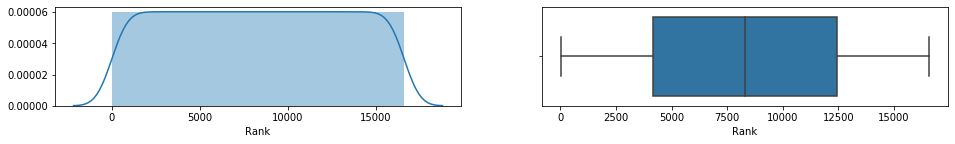

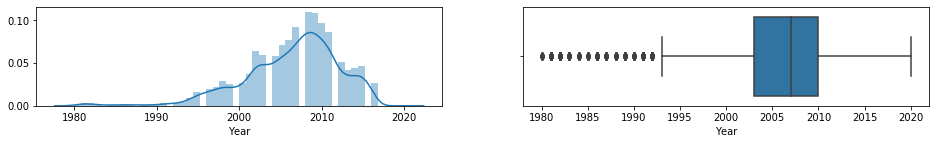

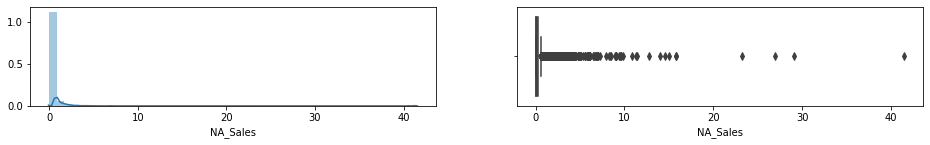

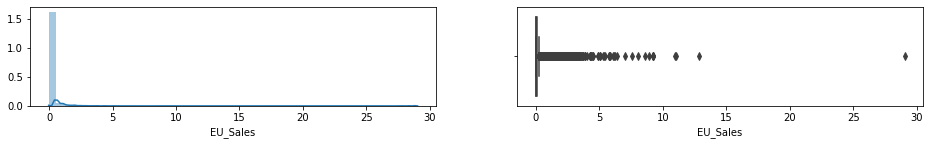

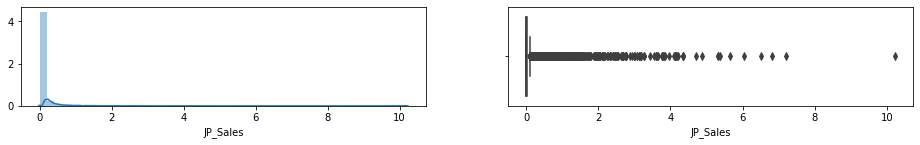

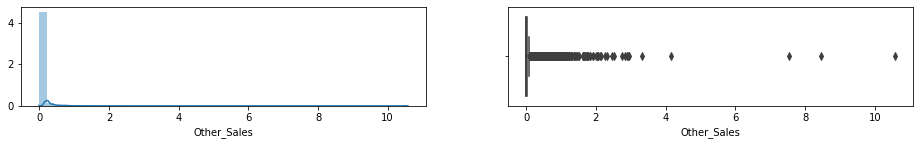

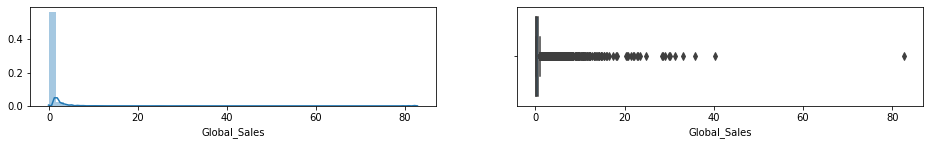

In [14]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        #histogram
        sns.distplot(df[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(df[list_var])
plotvariable(df,['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

In [15]:
#it is gerenally use when data is skewed
def get_outliers(data_f, list_fts):
    for list_ft in list_fts:
        Q1_25per = df[list_ft].quantile(0.25)
        Q3_75per = df[list_ft].quantile(0.75)
        IQR = Q3_75per - Q1_25per
        
        global lowwer_bound, upper_bound
        
        lowwer_bound = Q1_25per - 1.5 * IQR
        upper_bound = Q3_75per + 1.5 * IQR
        
        return Q1_25per, Q3_75per, IQR,lowwer_bound,upper_bound
    
Q1_25per = get_outliers(df,['Year'])

In [16]:
df[df['Year'] > upper_bound]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [17]:
df[df['Year'] < lowwer_bound]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
...,...,...,...,...,...,...,...,...,...,...,...
14335,14338,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.00,0.01,0.03
14507,14510,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.00,0.01,0.03
14599,14602,Doom,PC,1992,Shooter,id Software,0.02,0.00,0.00,0.00,0.03
15867,15870,Strongest Tokyo University Shogi DS,DS,1985,Action,Mycom,0.00,0.00,0.02,0.00,0.02


In [18]:
df['Year'] = np.where(df['Year'] > upper_bound,
                                        upper_bound,np.where(df['Year'] < lowwer_bound,
                                                            lowwer_bound,
                                                            df['Year']
                                                            )
                                        )

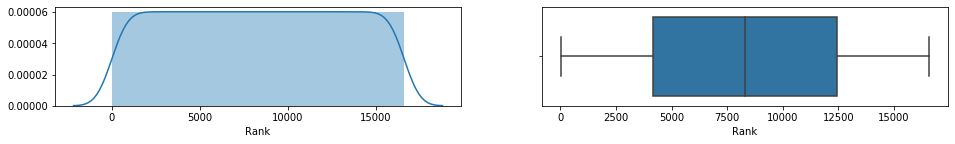

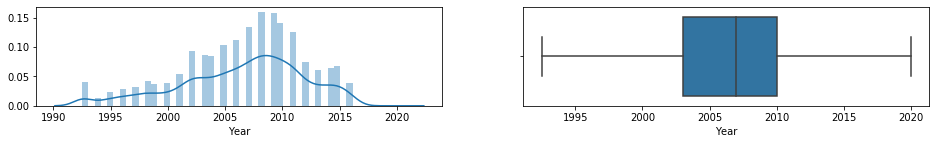

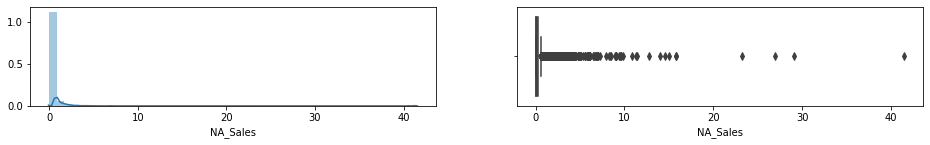

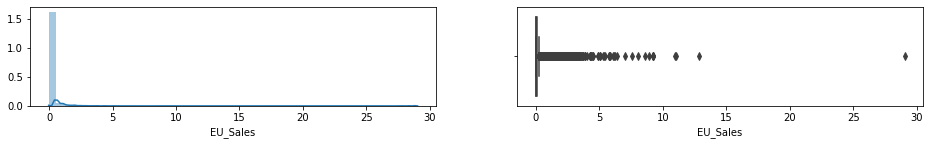

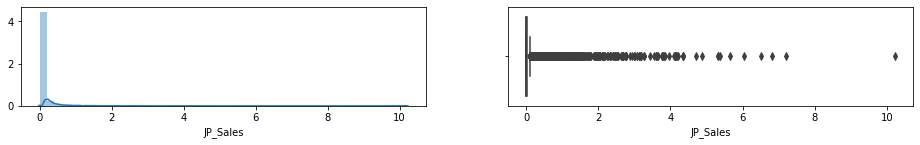

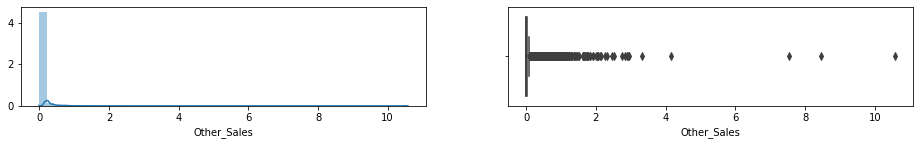

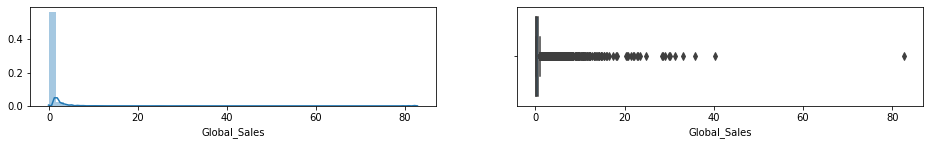

In [19]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        #histogram
        sns.distplot(df[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(df[list_var])
plotvariable(df,['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

In [20]:
'''here i define function with two variables to get difference of previous and new columns
afterwards i cleaned all unwantEd thkings fROM data such as below '''
def get_clean_data_column (new_column_name , column_name ):
    df[new_column_name] = df[column_name].apply(nfx.remove_emojis)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_punctuations)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_special_characters)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_multiple_spaces)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_stopwords)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_urls)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_visacard_addr)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_terms_in_bracket)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_street_address)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_puncts)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_postoffice_box)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_phone_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_html_tags)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_currency_symbols)
    return df[new_column_name]

In [22]:
'''here i made a dictionary in which i gave the names of new and previous columns '''
dict_names ={'Id':'Name',
             'Publishers':'Publisher',
            'Class':'Genre'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    get_clean_data_column(i,j)

In [23]:
df[['Id','Name']]

,Id,Name
0,Wii Sports,Wii Sports
1,Super Mario Bros,Super Mario Bros.
2,Mario Kart Wii,Mario Kart Wii
3,Wii Sports Resort,Wii Sports Resort
4,Pokemon RedPokemon Blue,Pokemon Red/Pokemon Blue
...,...,...
16593,Woody Woodpecker Crazy Castle,Woody Woodpecker in Crazy Castle 5
16594,Men Black II Alien Escape,Men in Black II: Alien Escape
16595,SCORE International Baja Official Game,SCORE International Baja 1000: The Official Game
16596,Know,Know How 2


In [24]:
df[['Publishers','Publisher']]

,Publishers,Publisher
0,Nintendo,Nintendo
1,Nintendo,Nintendo
2,Nintendo,Nintendo
3,Nintendo,Nintendo
4,Nintendo,Nintendo
...,...,...
16593,Kemco,Kemco
16594,Infogrames,Infogrames
16595,Activision,Activision
16596,GAMES,7G//AMES


In [25]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Id',
       'Publishers', 'Class'],
      dtype='object')

In [26]:
new_df = df[['Rank', 'Id', 'Platform', 'Year', 'Class', 'Publishers', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales',
             'Global_Sales']]

In [27]:
new_df

,Rank,Id,Platform,Year,Class,Publishers,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1992.5,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon RedPokemon Blue,GB,1996.0,RolePlaying,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker Crazy Castle,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men Black II Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know,DS,2010.0,Puzzle,GAMES,0.00,0.01,0.00,0.00,0.01


In [36]:
'''here i made a function to take new_column_name 
    than remove stopwords from that 
    further it converts them into list'''
def get_clean_list (new_column_name):
    clean_list = new_df[new_column_name].apply(nfx.remove_stopwords).tolist()
    return clean_list

In [43]:
id_list = get_clean_list("Id")
platform_list = get_clean_list("Platform")
class_list = get_clean_list("Class")
publishers_list = get_clean_list("Publishers")

In [45]:
#here i made a function for tokenazation in which each sentence is going to broken into single word
def get_token (function_name):
    tokens = [token for line in function_name for token in line.split()]
    return tokens

In [48]:
id_list_token = get_token(id_list)
platform_list_token = get_token(platform_list)
class_list_token = get_token(class_list)
publishers_list_token = get_token(publishers_list)

In [57]:
def get_lemmatization(input_str_name):
    '''Lemmatization is the process of grouping together the different inflected forms of a word
        so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings
        context to the words. So it links words with similar meanings to one word.'''
    input_str =input_str_name 
    for i in input_str:
        a = nltk.word_tokenize(i)
        for word in a:
            print(lemmatizer.lemmatize(word))

In [67]:
id_list_lemmatization = get_lemmatization(id_list_token)

Wii
Sports
Super
Mario
Bros
Mario
Kart
Wii
Wii
Sports
Resort
Pokemon
RedPokemon
Blue
Tetris
New
Super
Mario
Bros
Wii
Play
New
Super
Mario
Bros
Wii
Duck
Hunt
Nintendogs
Mario
Kart
DS
Pokemon
GoldPokemon
Silver
Wii
Fit
Wii
Fit
Plus
Kinect
Adventures
Grand
Theft
Auto
V
Grand
Theft
Auto
San
Andreas
Super
Mario
World
Brain
Age
Train
Brain
Minutes
Day
Pokemon
DiamondPokemon
Pearl
Super
Mario
Land
Super
Mario
Bros
Grand
Theft
Auto
V
Grand
Theft
Auto
Vice
City
Pokemon
RubyPokemon
Sapphire
Pokemon
BlackPokemon
White
Brain
Age
Training
Minutes
Day
Gran
Turismo
ASpec
Duty
Modern
Warfare
Pokmon
Yellow
Special
Pikachu
Edition
Duty
Black
Ops
Pokemon
XPokemon
Duty
Black
Ops
Duty
Black
Ops
II
Duty
Black
Ops
II
Duty
Modern
Warfare
Duty
Modern
Warfare
Grand
Theft
Auto
III
Super
Smash
Bros
Brawl
Duty
Black
Ops
Animal
Crossing
Wild
World
Mario
Kart
Halo
Grand
Theft
Auto
V
Pokemon
HeartGoldPokemon
SoulSilver
Super
Mario
Gran
Turismo
Super
Mario
Galaxy
Pokemon
Omega
RubyPokemon
Alpha
Sapphire
Super
Mario
La

LEGO
Marvel
Super
Heroes
Guild
Wars
Pokemon
Ranger
Shadows
Almia
Dead
Island
Tomb
Raider
II
God
War
Ascension
Need
Speed
Underground
Pro
Evolution
Soccer
Dance
Yokai
Watch
Busters
Mario
Bros
FIFA
Soccer
Star
Wars
Force
Unleashed
Borderlands
TOCA
Touring
Car
Championship
Paper
Mario
Sticker
Star
Sonics
Ultimate
Genesis
Collection
Super
Monkey
Ball
Banana
Blitz
Kirby
Nightmare
Dream
Land
Wario
Land
Guitar
Hero
III
Legends
Rock
Duty
Resident
Evil
Minecraft
Onimusha
Samurais
Destiny
Cool
Boarders
Paper
Mario
ThousandYear
Door
Madden
NFL
Monster
Hunter
Tri
Dissidia
Final
Fantasy
Sonic
Advance
Spyro
Season
Ice
Teenage
Mutant
Ninja
Turtles
II
Arcade
Game
LEGO
Indiana
Jones
Original
Adventures
Dance
Dance
Revolution
X
New
Super
Luigi
U
Prince
Persia
Sands
Time
Scribblenauts
Legend
Zelda
Links
Awakening
DX
Need
Speed
Hot
Pursuit
BioShock
Assassins
Creed
IV
Black
Flag
Devil
Cry
Dantes
Awakening
Special
Edition
Rock
Band
Frogger
Guitar
Hero
II
Wario
Land
Pro
Yakyuu
Family
Stadium
Sonic
Unleashed


Edition
FIFA
Mario
Golf
Toadstool
Tour
Tiger
Woods
PGA
Tour
Golf
Donkey
Kong
Country
Tropical
Freeze
Dead
Space
Sonic
Rivals
Knockout
Kings
Simpsons
Skateboarding
NASCAR
F
Race
Xevious
NASCAR
NBA
Live
Mafia
II
Duty
Super
Monkey
Ball
PacMan
World
Madden
NFL
Sonic
Sega
AllStars
Racing
LEGO
Star
Wars
III
Clone
Wars
Football
Manager
Puzzle
Dragons
Mega
Man
Simpsons
Wrestling
NBA
Live
Simpsons
Game
Monopoly
SoulCalibur
II
Resistance
Tokyo
Xtreme
Racer
Zero
Final
Fantasy
XIV
Realm
Reborn
NFL
Blitz
Red
Faction
II
Super
Scribblenauts
Madden
NFL
WWF
Mercy
Ice
Climber
Sonic
CD
Ninja
Hattori
Kun
Ninja
wa
Shuugyou
Degogiru
Maki
Dead
Rising
Rock
Band
PacMan
World
Disney
Sing
Pop
Hits
Final
Fantasy
Crystal
Chronicles
Medal
Honor
Frontline
Madden
NFL
Drawn
Life
SpongeBob
SquarePants
Edition
BanjoTooie
Buzz
BIG
Quiz
Quantum
Solace
Sims
New
Play
Control
Mario
Power
Tennis
Bratz
Forever
Diamondz
Dirge
Cerberus
Final
Fantasy
VII
Nintendo
World
Cup
WWF
WrestleMania
Wario
Land
II
Mass
Effect
Major
League
B

Shrek
Shrek
Gameboy
Advance
Video
Test
Drive
FIFA
Soccer
World
Soccer
Winning
JP
sale
Lord
Rings
Fellowship
Ring
LEGO
Star
Wars
III
Clone
Wars
ATV
Offroad
Fury
Pikmin
Dance
Disney
Sing
Battlefield
Hardline
WWE
K
Dragon
Ball
Z
La
Legende
Saien
TwinBee
Ganbare
Goemon
Karakuri
Douchuu
NFL
K
SolarStriker
Enter
Matrix
NHL
Mario
v
Donkey
Kong
March
Minis
PokPark
Wii
Pikachus
Adventure
Piece
Pirate
Warriors
WWE
K
Metal
Gear
Solid
Portable
Ops
Nuclear
Strike
Captain
Toad
Treasure
Tracker
WWE
SmackDown
v
Raw
Simpsons
Road
Rage
Pro
Evolution
Soccer
SpongeBob
SquarePants
Revenge
Flying
Dutchman
Mario
Sonic
London
Olympic
Games
Scarface
World
Kobe
Bryant
NBA
Courtside
Disneys
Chip
n
Dale
Rescue
Rangers
Dukes
Hazzard
Racing
Home
Hitman
Silent
Assassin
FIFA
SpiderMan
Movie
Final
Fantasy
II
Dawn
Souls
NBA
K
Pokemon
Super
Mystery
Dungeon
Dance
Metal
Gear
Solid
VR
Missions
Pole
Position
Resident
Evil
Operation
Raccoon
City
LEGO
Indiana
Jones
Original
Adventures
Pro
Yakyuu
Family
Stadium
Shenmue
Mario
T

Shop
Final
Fantasy
Type
Madden
NFL
de
Blob
NCAA
Football
Mass
Effect
NBA
K
Fire
Emblem
Yakuza
Skylanders
Spyros
Adventure
Club
Penguin
Game
Day
NHL
Grand
Theft
Auto
Vice
City
Stories
NBA
K
FIFA
Soccer
LEGO
Lord
Rings
Romancing
SaGa
Donkey
Kong
Junior
LEGO
Star
Wars
II
Original
Trilogy
LEGO
Harry
Potter
Years
Final
Fantasy
X
X
HD
Remaster
Medal
Honor
Underground
Sims
Dark
Cloud
Jampack
Summer
PlayStation
AllStars
Battle
Royale
Dance
Dance
Revolution
nd
ReMIX
Monster
High
Ghoul
Spirit
Dragon
Quest
X
LEGO
Pirates
Caribbean
Video
Game
Gangs
London
Mortal
Kombat
Trilogy
Star
Soldier
Sonic
Unleashed
Lost
Planet
NHL
Dragon
Quest
Monsters
Terrys
Wonderland
Weight
Loss
Coach
Tom
Clancys
Ghost
Recon
Future
Soldier
Mega
Man
Star
Force
Dragon
Leo
Pegasus
Shinobi
Mortal
Kombat
Deadly
Alliance
Witcher
Assassins
Kings
PilotWings
Resort
Naruto
Shippuden
Ultimate
Ninja
Storm
LEGO
Jurassic
World
ESPN
NBA
K
Wheel
Fortune
World
Championship
Poker
Tom
Clancys
Splinter
Cell
Chaos
Theory
SpongeBob
SquarePant

Tale
San
Francisco
Rush
Extreme
Racing
Amazing
SpiderMan
Console
Version
Zone
Enders
Red
Faction
Guerrilla
Street
Fighter
EX
Plus
Alpha
Madden
NFL
Coded
Arms
Tony
Hawks
Underground
Tales
Vesperia
XMen
Origins
Wolverine
Uncaged
Edition
Madagascar
Escape
Africa
SplitSecond
Capcom
v
SNK
Mark
Millennium
MVP
NCAA
Baseball
Dance
Borderlands
PreSequel
LittleBigPlanet
Marvel
Ultimate
Alliance
Sega
Superstars
Tennis
Walking
Dead
Season
Ace
Combat
Assault
Horizon
Jump
Ultimate
Stars
Jampack
Summer
Resonance
Fate
Burnout
Tom
Clancys
Rainbow
Vegas
Final
Fantasy
XIII
LEGO
Batman
DC
Super
Heroes
Mortal
Kombat
Unchained
Mario
Luigi
Paper
Jam
YuGiOh
Dungeon
Dice
Monsters
Brink
LEGO
Marvel
Super
Heroes
Blur
Madden
NFL
Namco
Museum
Remix
Midnight
Club
DUB
Edition
Crysis
Lord
Rings
Towers
Tiger
Woods
PGA
Tour
Indiana
Jones
Staff
Kings
Jet
Moto
Naruto
Shippuden
Ultimate
Ninja
Storm
Generations
Unreal
Championship
WarioWare
Twisted
Pirates
Caribbean
Worlds
End
Tiger
Woods
PGA
Tour
Persona
Arena
Sword
Mana


Game
Hunter
Mobile
Suit
Z
Gundam
AEUG
v
Titans
Dance
Duty
Black
Ops
God
War
III
Ape
Escape
Metroid
Prime
Trilogy
XMan
Transformers
Revenge
Fallen
XBox
PS
PC
Versions
Advance
Wars
Days
Ruin
Sims
Generations
Crew
Battle
Giants
Dragons
Dragon
Quest
Monsters
Joker
Sonic
AllStars
Racing
Transformed
Shin
Megami
Tensei
Persona
FES
FIFA
Soccer
Shin
Megami
Tensei
Persona
Portable
Final
Fantasy
VII
International
Tiger
Woods
PGA
Tour
Masters
Okami
NHL
World
Zoo
LEGO
Jurassic
World
Wet
MySims
Racing
Buzz
Lightyear
Star
Command
Namco
Museum
Nobunaga
Yabou
Haouden
Virtua
Cop
Metal
Gear
Solid
Substance
Tony
Hawks
American
Wasteland
WWF
House
Prince
Persia
Forgotten
Sands
Vanquish
Wild
ARMs
NBA
ShootOut
Sacred
Fallen
Angel
Madden
NFL
Far
Cry
Battlezone
Tiger
Woods
PGA
Tour
LEGO
Pirates
Caribbean
Video
Game
Pro
Evolution
Soccer
Evolve
Tak
Staff
Dreams
Dead
Island
Riptide
Warriors
Orochi
Bolt
Viewtiful
Joe
Urbz
Sims
City
Beetle
Adventure
Racing
FIFA
Soccer
Disneys
Dalmatians
Puppies
Rescue
Wipeout
Game


Team
Racing
Worlds
II
Sonic
AllStars
Racing
Transformed
Michael
Jackson
Experience
Mission
Fairly
Odd
Parents
Breakin
Da
Rules
LEGO
Dimensions
Inazuma
Ninokuni
Shikkoku
Madoushi
Minecraft
Story
Mode
Resident
Evil
Revelations
Manhunt
SRS
Street
Racing
Syndicate
Despicable
Game
Minion
Mayhem
Def
Jam
Fight
NY
Action
Force
Gauntlet
Legends
FIFA
Kidou
Senshi
Gundam
Extreme
VS
Dragon
Ball
Z
Ultimate
Tenkaichi
Tales
Symphonia
Bust
Groove
Fire
Emblem
Path
Radiance
Dragon
Quest
Characters
Torneko
Daibouken
Fushigi
Dungeon
Lets
Draw
PachiSlot
Aruze
Oukoku
NHL
Valkyria
Chronicles
II
MiddleEarth
Shadow
Mordor
Madden
NFL
Rune
Factory
Fantasy
Harvest
Moon
Terminator
Salvation
Cars
Bratz
Rock
Angelz
Train
Dragon
SSX
Tricky
WWE
SmackDown
v
Raw
Greg
Hastings
Tournament
Paintball
Hello
Kitty
Big
City
Dreams
Star
Fox
Command
World
Soccer
Winning
International
JP
version
ESPN
NBA
Basketball
Inazuma
Hedge
Mat
Hoffmans
Pro
BMX
Lego
Star
Wars
Force
Awakens
Epic
Mickey
Power
Popeye
Magicians
Quest
Mysterious


Disneys
Kim
Possible
Team
Possible
Rygar
Legendary
Adventure
Syphon
Filter
Logans
Shadow
Super
Batter
Kessen
II
Crayon
ShinChan
Arashi
Yobu
Enji
Stuart
Little
Wolfenstein
New
Order
Warhammer
Space
Marine
Tak
Staff
Dreams
Art
Academy
Lessons
Sid
Meiers
Civilization
Revolution
ATV
Offroad
Fury
Pro
Dora
Explorer
Dora
Saves
Snow
Princess
SingStar
Amped
Brothers
Arms
Earned
Blood
Walk
Transformers
Dark
Moon
AutobotsDecepticons
Dragon
Ball
Z
Sagas
ScoobyDoo
Legend
Spyro
Dawn
Dragon
Hydro
Thunder
Brothers
Arms
DDay
American
Girl
Kit
Mystery
Challenge
Mario
Sonic
Rio
Olympic
Games
NHL
FaceOff
Deadpool
Brothers
Arms
Road
Hill
Virtua
Tennis
EA
Sports
UFC
Gremlins
Mark
Kri
Jampack
Winter
RPM
Rugrats
Castle
Capers
Crash
Nitro
Kart
Star
Wars
Clone
Wars
Republic
Heroes
Farming
Simulator
Bleach
Blade
Fate
Madden
NFL
LEGO
Rock
Band
Mad
Max
Barbie
Jet
Set
Style
Jak
Daxter
Lost
Frontier
Momotarou
Dentetsu
Command
Conquer
Red
Alert
Tomb
Raider
Legend
Skylanders
SuperChargers
Golden
Compass
Star
Wars
Demo

Spore
Hero
Mass
Effect
Trilogy
NASCAR
Racing
LEGO
Jurassic
World
Monotaro
Dentetsu
Sengoku
Ishin
Hero
Daishuugou
Maki
SpiderMan
Web
Shadows
Boku
Natsuyasumi
Umi
Bouken
Hen
SpongeBob
SquigglePants
Cars
RaceORama
Fantastic
Pets
Command
Conquer
Red
Alert
Star
Wars
Clone
Wars
Republic
Heroes
Dig
Dug
Ogre
Battle
Person
Lordly
Caliber
Superman
New
Superman
Adventures
UEFA
Euro
AustriaSwitzerland
Terminator
Dawn
Fate
LEGO
Movie
Videogame
Rogue
Galaxy
Directors
Cut
Armored
Core
Monster
Trucks
Mayhem
Winter
Sports
Challenge
Green
Day
Rock
Band
Densha
De
Transformers
Fall
Cybertron
Duty
Advanced
Warfare
Disney
Princess
Enchanting
Storybooks
Monopoly
Streets
Band
Hero
Wonderful
Heroes
Desperate
Struggle
Battlefield
Modern
Combat
Armored
Core
Age
Buzz
Junior
Jungle
Party
Mortal
Kombat
Deadly
Alliance
Marvel
Ultimate
Alliance
NBA
K
AKB
Idol
Koishitara
Pro
Pinball
Koshien
NBA
K
YuGiOh
Eternal
Duelist
Soul
JP
sale
Speed
Racer
Videogame
Naughty
Bear
Littlest
Pet
Shop
TNA
iMPACT
Dance
Kids
Duke
Nukem
F

Kaizokudan
Tale
Despereaux
Aggressive
Inline
Karaoke
Revolution
NFL
Street
Hello
Kitty
Daily
Metal
Arms
Glitch
System
Farming
Simulator
Jikkyou
Powerful
Pro
Yakyuu
Rally
Cross
EverGrace
Def
Jam
Icon
Lunar
Eternal
Blue
Complete
Street
Fighter
Alpha
Warriors
Dreams
Rugrats
Royal
Ransom
Disney
Fairies
Tinker
Bell
Great
Fairy
Rescue
MLB
F
Race
Stars
Hedge
Naruto
Shippuden
Ultimate
Ninja
Impact
Dance
Charlie
Chocolate
Factory
Pirates
Caribbean
Worlds
End
UEFA
Euro
AustriaSwitzerland
Kurushi
Final
Mental
Blocks
Style
Lab
Jewelry
Design
Risk
Battleship
Clue
SD
Gundam
G
Generation
World
LEGO
Pirates
Caribbean
Video
Game
Wild
Thornberrys
Movie
High
School
Musical
Senior
Year
DANCE
Dynasty
Warriors
Empires
SoulCalibur
WipEout
Etrian
Odyssey
Conan
Classic
NES
Series
Ice
Climber
Skylanders
Trap
Team
Avatar
Airbender
Burning
Earth
FEAR
Tenchu
Z
Freeway
Driver
Advance
Monster
Rancher
Iron
Man
Chicken
Riot
Tim
Burtons
Nightmare
Christmas
Oogies
Revenge
Iron
Storm
Harry
Potter
Deathly
Hallows
MotorSto

Ryuuta
Kyouju
Kanshu
Nou
Ryoku
Trainer
Portable
Karaoke
Revolution
Glee
Volume
Spyro
Attack
Rhynocs
Army
Men
World
War
Land
Sea
Air
DaiJi
Super
Robot
Taisen
OG
Stranglehold
Trauma
Center
New
Blood
Shrek
Lumines
NES
Remix
AD
Jumping
Flash
Karaoke
Revolution
Party
Batman
Brave
Bold
Videogame
Burnout
Lizzie
McGuire
Homecoming
Havoc
Chaos
Legion
PowerUp
Heroes
NASCAR
Game
Puyo
Puyo
Shrek
Forever
Charlie
Chocolate
Factory
Neopets
Darkest
Faerie
Blazing
Heroes
Rhythm
Tengoku
Super
Robot
Taisen
W
Cart
World
Series
Invizimals
Shadow
Zone
Game
SpiderMan
Dukes
Hazzard
II
Daisy
Dukes
Famista
Squinkies
Zoo
Tycoon
DS
Looney
Tunes
Duck
Amuck
Super
Robot
Taisen
OG
Original
Generations
Gaiden
Drakengard
Decathlete
Sims
Disgaea
Absence
Detention
Tom
Clancys
Splinter
Cell
DmC
Devil
Cry
Jonas
Dynasty
Warriors
Wacky
Races
Crash
Dash
Dynasty
Warriors
Xtreme
Legends
Toukiden
Kiwami
Sengoku
Basara
Samurai
Heroes
Romance
Kingdoms
VIII
Fossil
Fighters
JP
sale
Daikaijyuu
Monogatari
Tropico
Hard
Hitter
Tennis
Gl

Pro
Yakyuu
NBA
Jam
Shadow
Man
Command
Conquer
Juarez
Cartel
Shadow
Rome
Tohoku
Daigaku
Karei
Igaku
Kenkyuusho
Kawashima
Ryuuta
Kyouju
Kanshuu
Mono
Sugoku
Nou
Kitaeru
Funkan
Oni
Training
Tales
Eternia
Harry
Potter
Order
Phoenix
Ben
Triple
Pack
Need
Speed
Rivals
Stuntman
Ignition
Fantastic
Mat
Hoffmans
Pro
BMX
MotoGP
Penguins
Madagascar
Summer
Athletics
Ultimate
Challenge
sale
Rock
Revolution
Etrian
Odyssey
II
Heroes
Lagaard
LEGO
Hobbit
Jikkyou
Powerful
Pro
Yakyuu
Incredible
Hulk
Resident
Evil
Revelations
Major
League
Baseball
K
NASCAR
Game
Thoroughbred
Breeder
II
Shin
Megami
Tensei
Devil
Survivor
Magical
Vacation
XGIII
Extreme
G
Racing
NBA
Live
Dragon
Ball
XenoVerse
NASCAR
Thunder
Section
Superbike
Americas
Test
Kitchen
Lets
Cooking
Final
Fantasy
XI
Ultimate
Collection
Fire
Emblem
Shin
Monshou
Nazo
Hikari
Kage
Eiyuu
F
Codemasters
Connect
Perfection
Trouble
Wipeout
Ratatouille
Incredible
Hulk
Dora
Explorer
Dora
Saves
Crystal
Kingdom
Alundra
New
Legend
Begins
Reign
Fire
ScoobyDoo
Spooky
S

Path
Destruction
Tongari
Boushi
Oshare
na
Mahou
Tsukai
Panzer
General
Broken
Sword
Shadow
Templars
Directors
Cut
Gallop
Racer
JP
Spawn
Eternal
MLB
Army
Men
Sarges
Heroes
Command
Conquer
Kanes
Wrath
Dreamcast
Collection
Madden
NFL
Corpse
Party
Blood
Drive
Homefront
Disney
Stitch
Jam
Bakugan
Battle
Brawlers
Britneys
Dance
Beat
Guitar
Freaks
World
Soccer
Winning
Ace
Combat
Assault
Horizon
Legacy
Cabelas
Outdoor
Adventures
SRS
Street
Racing
Syndicate
Namco
Tennis
Smash
Court
Vexx
Incredible
Hulk
BioShock
Marvel
v
Capcom
Origins
Pro
Yaky
Spirits
Imagine
Teacher
Class
Trip
TimeSplitters
Future
Perfect
Final
Fantasy
Fables
Chocobo
Tales
Harvest
Moon
Magical
Melody
Genma
Onimusha
DK
King
Swing
K
Revenge
GPolice
Pure
Futbol
SpiderMan
Shattered
Dimensions
Corvette
Atelier
Meruru
Alchemist
Arland
ACDC
LIVE
Rock
Band
Track
Pack
Deca
Sports
Harry
Potter
Goblet
Fire
Midway
Arcade
Treasures
Extended
Play
F
Skylanders
SWAP
Force
Bass
Pro
Shops
Hunt
Deserve
Lord
Boogie
SuperStar
Burnout
Point
Impact
Ro

Steel
Tom
Clancys
Rainbow
Siege
Dungeon
Hunter
Alliance
LEGO
Harry
Potter
Years
Duel
Masters
Kaijudo
Showdown
Imagine
Boutique
Owner
Walking
Dead
Season
Lord
Rings
Age
Cursed
Mountain
Suffering
Dragon
Quest
Builders
Revive
Alefgard
Tetris
Worlds
Teenage
Mutant
Ninja
Turtles
Danger
Ooze
ECW
Hardcore
Revolution
Mega
Man
ChouKuukan
Night
Pro
Yakyuu
Kinghigher
JP
sale
Rampage
Universal
Tour
Ms
PacMan
Maze
Madness
Tales
Graces
Age
Empires
Mythologies
Viewtiful
Joe
Wheres
Waldo
Fantastic
Journey
ATV
Quad
Kings
MaryKate
Ashley
Sweet
Licenced
Drive
Jewel
Quest
Expeditions
NBA
Jam
Extreme
Dragon
Ball
Origins
JP
incomplete
sale
Touch
Dead
Tropico
Nickelodeon
Party
Blast
Ben
Alien
Force
Vilgax
Attacks
NHL
Championship
GI
Joe
Rise
Cobra
Shellshock
Nam
Hunted
Demons
Forge
Kartia
Word
Fate
Tales
Berseria
AllStar
Baseball
Magna
Carta
Tears
Blood
Lethal
Skies
Elite
Pilot
Team
SW
Capcom
v
SNK
NBA
Live
AllPlay
Infinite
Space
Yoostar
Transformers
Devastation
Tamagotchi
KiraKira
Omisecchi
Russia
Love
Dont

Harvest
San
Francisco
Rush
Super
Robot
Taisen
Snowboard
Kids
NBA
IHRA
Drag
Racing
Shining
Hearts
Magical
ZhuZhu
Princess
Carriages
Castles
Code
Princess
Tomb
Raider
Underworld
Con
Tony
Hawks
Pro
Skater
Jissen
PachiSlot
Hisshouhou
Aladdin
Namco
Museum
th
Anniversary
Ford
Racing
Road
Witch
Knight
Nobunaga
Yabou
Reppuuden
Hot
Wheels
Track
Attack
Schlag
den
Raab
UFC
Personal
Trainer
Ultimate
Fitness
System
Total
War
Shogun
Fall
Samurai
BIGS
Mat
Hoffmans
Pro
BMX
Treasure
Hunter
G
Untold
Legends
Dark
Kingdom
Russia
Love
Wing
Arms
Dead
Space
Pro
Yaky
Spirits
Wish
Merry
Christmas
BioShock
Collection
DanceDanceRevolution
Cabelas
Big
Game
Hunter
Grandia
II
Namco
Museum
Vol
Cheetah
Girls
Passport
Stardom
UFC
Personal
Trainer
Ultimate
Fitness
System
Train
Dragon
Shark
Tale
NFL
Street
Pro
Yaky
Spirits
Teenage
Mutant
Ninja
Turtles
Mutant
Nightmare
Secret
World
Imagine
Soldier
Fortune
Payback
Ridge
Racer
Bleach
rd
Phantom
Gladius
Family
Feud
Edition
Dave
Mirra
Freestyle
BMX
Spore
Hero
Arena
Pro
Yaky


JP
weekly
sale
Chocobo
Fushigi
Dungeon
WonderSwan
Klonoa
Door
Phantomile
Vietcong
Purple
Haze
Hitman
HD
Trilogy
Atari
Anniversary
Advance
Summer
Athletics
Ultimate
Challenge
Driver
San
Francisco
Metal
Gear
Acd
Hatsune
Miku
Future
Stars
Project
Mirai
Lets
TAP
XMen
Origins
Wolverine
TalkMan
Japan
Cabelas
Adventure
Camp
LEGO
Marvels
Avengers
Bloody
Roar
Primal
Fury
Shrek
SuperSlam
Sing
UK
Hits
Mega
Man
Soccer
Chronicles
Narnia
Prince
Caspian
ZhuZhu
Puppies
Rabbids
Party
Collection
Trinity
Universe
Jewel
Match
FIFA
Soccer
Dungeon
Travelers
Royal
Library
Monster
Seal
Dying
Light
Vampire
Savior
Lord
Vampire
Pokmon
Choose
Squirtle
Squad
Game
Boy
Advance
Video
Super
Robot
Taisen
UX
Flags
Fun
Park
Test
Drive
OffRoad
Wide
Open
Guilty
Gear
Xrd
Sign
Pro
Yaky
Spirits
Ben
Ultimate
Alien
Cosmic
Destruction
Dengeki
Bunko
Fighting
Climax
Battle
Commander
Hachibushu
Shura
Heihou
Backbreaker
Odin
Sphere
Leifthrasir
Bad
Boys
Miami
Takedown
Jampack
Vol
SpiderMan
Friend
Foe
Mega
Man
X
Command
Mission
Tokyo


Brawlers
Defenders
Core
Mr
Dos
Castle
Death
Trap
Armor
Ambush
Parodius
Thrillville
Rails
Hyperdimension
Neptunia
Victory
Taz
Wanted
Mobile
Suit
Gundam
Extreme
VS
Force
Sid
Meiers
Pirates
MLB
Phantasy
Star
Online
Vehicular
Combat
League
present
Motor
Mayhem
PoPoLoCrois
Hajimari
Bouken
Star
Wars
Super
Bombad
Racing
Hamster
Heroes
Hot
Wheels
Velocity
X
Ar
Nosurge
Ode
Unborn
Star
Chaotic
Shadow
Warriors
Leisure
Suit
Larry
Box
Office
Bust
Alien
Resurrection
World
Tour
Soccer
Dungeon
Siege
Throne
Agony
SpiderMan
Web
Shadows
Amazing
Allies
Edition
F
Rio
Gunslingers
Create
Lufia
Curse
Sinistrals
El
Shaddai
Ascension
Metatron
ESPN
College
Hoops
Thor
God
Thunder
F
Championship
Season
Guilty
Gear
Judgment
Pen
Grand
Prix
Penguin
Mondai
Special
Clash
Titans
World
Days
Robotech
Battlecry
True
Swing
Golf
Zapper
Wicked
Cricket
Bomberman
Land
Paws
Claws
Pet
Resort
Kya
Dark
Lineage
Dynasty
Warriors
Xtreme
Legends
Curious
George
Monster
Jam
Medieval
Games
Stronghold
Amazing
SpiderMan
Console
Version
Kid


Trails
Cold
Steel
II
Gun
Combat
Zones
JLeague
Victory
Goal
Bakugan
Battle
Brawlers
Defenders
Core
Oreshika
Tainted
Bloodlines
White
Knight
Chronicles
Origins
Return
PopoloCrois
Story
Seasons
Fairytale
Spongebob
Squarepants
Fairly
Odd
Parents
Double
Pack
History
Civil
War
Secret
Missions
NHL
Mirrors
Edge
Catalyst
Derby
Stallion
Doraemon
Nobi
Dai
Machi
SOS
Space
Station
Silicon
Valley
Dark
Rift
Tokyo
Xanadu
AllStar
Baseball
Burger
Island
Petz
Dogz
Talent
Tai
Fu
Wrath
Tiger
Rocky
Ford
Racing
Odin
Sphere
Leifthrasir
Sam
Max
Season
Virtua
Tennis
Tetris
Attack
Candace
Kanes
Candy
Factory
BloodRayne
Hot
Wheels
Beat
Soldier
Fortune
Payback
Jaws
Unleashed
Pro
Yaky
Spirits
Star
Trek
Voyager
Elite
Force
XMen
Official
Game
Brain
Boost
Gamma
Wave
Scarface
World
Rock
Band
Metal
Track
Pack
Chessmaster
II
AllStar
Baseball
ScoobyDoo
Mystery
Mayhem
Winning
Post
Major
League
Baseball
K
DreamWorks
Super
Star
Kartz
Pro
Baseball
Spirits
Ride
Die
Curious
George
Strawberry
Shortcake
Game
Boy
Advance
Video
Vol

Kouchuu
Ouja
Mushi
King
Greatest
Champion
e
Michi
DS
Super
Robot
Wars
BX
Persona
Arena
Tomb
Raider
Legend
Nagano
Winter
Olympics
Destroy
Humans
Path
Furon
Winning
Post
Star
Wars
Lethal
Alliance
Midnight
Mysteries
Edgar
Allan
Poe
Conspiracy
Star
Cheer
Squad
Frogger
RPG
Maker
II
Resident
Evil
Revelations
SpongeBobs
Surf
Skate
Roadtrip
Destruction
Derby
Arenas
Cabelas
Dangerous
Hunts
Unholy
War
Chuck
E
Cheeses
Game
Room
Wantame
Music
Channel
Doko
Demo
Style
Disneys
Winnie
Poohs
Rumbly
Tumbly
Adventure
Shaman
King
Power
Spirit
Eat
Lead
Return
Matt
Hazard
Attack
Titan
KOEI
Soccer
Tsuku
DS
World
Challenge
Family
Fortunes
Megamind
Blue
Defender
Contra
III
Alien
Wars
Dead
Rights
Reckoning
BIGS
Slime
MoriMori
Dragon
Quest
Taikaizoku
Shippo
Dan
Amagami
Diablo
II
Train
Dragon
NBA
Smurfs
NeverDead
Fear
Downhill
Mountain
Biking
Fire
ProWrestling
Eternal
Poison
JP
sale
Mission
Impossible
Operation
Surma
Naruto
Shippuden
Kizuna
Drive
IdolMster
MX
Featuring
Ricky
Carmichael
Indianapolis
Legends
Romanc

Squares
Cabelas
Deer
Hunt
Season
SplashDown
Nobunaga
Yabou
Tenshoki
Stronghold
Warhammer
Battle
March
F
Racing
Championship
Dead
Mans
Hand
Smash
Cars
NASCAR
Karaoke
Revolution
Presents
American
Idol
Encore
Nickelodeon
Dance
Pac
n
Roll
Cabelas
North
American
Adventures
Mechanic
Master
Jikkyou
Powerful
Pro
Yakyuu
Ketteiban
Melty
Blood
Act
Cadenza
Dokapon
Kingdom
ToeJam
Earl
III
Mission
Earth
Phantasy
Star
Collection
Doukoku
Shoshite
LEGO
Knights
Kingdom
Final
Fantasy
III
Family
Game
Night
Game
Retro
Game
Challenge
NBA
Jam
Extend
Extra
Shining
Force
NEO
Tony
Hawks
Pro
Skater
Brain
Quest
Grades
SingStar
Latino
Girl
Time
Army
Men
Sarges
War
Ultimate
Mortal
Kombat
Pocket
Soccer
League
Calciobit
Primal
Rage
FIFA
Street
DiRT
Rally
Heart
Catch
PreCure
Oshare
Collection
UEFA
Euro
Taito
Legends
Tom
Clancys
Rainbow
Rogue
Spear
BoomBots
Monster
Madness
Battle
Suburbia
Star
Trek
Conquest
FIFA
Soccer
Life
Strange
NFL
Head
Coach
World
Championship
Rugby
Phantom
Dust
Shinseiki
Evangelion
Koutetsu
Girlf

Learn
Chess
Happy
Feet
Escape
Monkey
Island
Leisure
Suit
Larry
Box
Office
Bust
Wolf
Mickeys
Speedway
USA
weekly
JP
sale
Wants
Millionaire
rd
Edition
Boku
Natsuyasumi
Portable
Mushi
Mushi
Hakase
Teppenyama
Himitsu
Miami
Law
Macross
Ginga
Tsunagu
Utagoe
Kidou
Senshi
Gundam
UC
YuGiOh
Ds
Wheelie
Breakers
Nicktoons
MLB
Gretzky
NHL
Corvette
Evolution
GT
Mays
Mystery
Forbidden
Memories
PictoImage
Etrian
Odyssey
II
Heroes
Lagaard
Ridge
Racer
Momotarou
Dentetsu
Igor
Game
Dropship
United
Peace
Force
Road
Rash
Jailbreak
Rome
Total
War
Green
Lantern
Rise
Manhunters
Castlevania
Lords
Shadow
Lucha
Libre
AAA
Heroes
del
Ring
Syberia
G
Jockey
Shrek
Forever
Atsumare
Power
Pro
Kun
DS
Koushien
Revolution
X
Myst
Little
Battlers
eXperience
W
Riviera
Promised
Land
Risen
Titan
Lords
Gun
Combat
Zones
Bujingai
Forsaken
City
Doko
Demo
Issho
Alvin
Chipmunks
Squeakquel
Story
Noahs
Ark
Brooktown
High
Senior
Year
Astro
Boy
Video
Game
Zombie
Army
Trilogy
Good
Evil
Blitz
League
II
Death
Degrees
Vandal
Hearts
II
Gouket

Warlock
Firetop
Mountain
Agassi
Tennis
Generation
Young
Justice
Legacy
Metal
Slug
X
Samurai
Shodown
Anthology
Space
Invaders
Extreme
Driver
Renegade
Running
Wild
Romance
Kingdoms
X
Brigandine
Legend
Forsena
Pro
Evolution
Soccer
MX
SuperFly
featuring
Ricky
Carmichael
Disneys
Haunted
Mansion
Sound
Novel
Machi
FIFA
Major
League
Soccer
Love
Puppies
Jikkyou
Powerful
Pro
Yakyuu
Ketteiban
Pokemon
Rumble
World
JASF
Janes
Advanced
Strike
Fighters
Beaterator
Skies
Arcadia
NASCAR
Dirt
Daytona
Demon
Chaos
Challenge
Brain
Puzzles
Cake
Mania
Main
Street
Road
Trip
Blood
Bahamut
Damnation
DaGeDar
Quiz
Magic
Academy
DS
Futatsu
Jikuu
Koku
Lilie
Atelier
Salburg
Renkinjutsushi
Supremacy
MMA
Gun
Firestorm
Advance
Justice
League
Heroes
Project
Eden
Disney
Art
Academy
Pipe
Mania
NERF
NStrike
Double
Blast
Bundle
Space
Chimps
Sega
Casino
Ben
Galactic
Racing
Ghosthunter
Junior
Mystery
Quest
Obscure
Aftermath
Family
GameShow
Great
Party
Games
Seven
Molmorth
Kiheitai
Doraemon
Nobita
Midori
Kyojinden
DS
Jimmie
Joh

Meltdown
Seven
Samurai
XX
Minute
Solution
Hisshou
PachinkoPachiSlot
Kouryaku
Series
DS
Vol
Shinseiki
Evangelion
Shito
Futatabi
Jikkyou
Powerful
Pro
Yakyuu
Cloudy
Chance
Meatballs
Tom
Clancys
Splinter
Cell
Pandora
Tomorrow
Ultimate
Ghosts
n
Goblins
Slayers
Royal
Swingerz
Golf
Pro
Evolution
Soccer
JP
sale
Petz
Fantasy
Sunshine
Magic
COP
Recruit
Adventure
Time
Explore
Dungeon
Dont
Know
Toukiden
King
Fighters
Tornado
Outbreak
Pretty
Rhythm
Rainbow
Live
Kira
Kira
Design
Nobunagas
Ambition
Rise
Power
FIFA
Soccer
Adventure
Time
Secret
Nameless
Kingdom
Little
League
World
Series
Baseball
Double
Play
DanceDanceRevolution
Solitaire
Mahjong
Tangram
Popn
Music
Outlaw
Golf
Worms
Space
Oddity
SteinsGate
Hiyoku
Renri
Darling
Diegos
Build
Rescue
Kings
Field
Japan
Slam
n
Jam
featuring
Magic
Kareem
Far
Cry
Vengeance
Looney
Tunes
Acme
Arsenal
Samurai
Shodown
Sen
BangaiO
Spirits
NASCAR
Game
Inside
Line
ToraDora
Portable
Italian
Job
Smugglers
Run
Warzones
Kaidan
Restaurant
Ura
Menu
Sen
RC
Stunt
Copter
Yama

Origin
NCAA
College
Football
K
Monster
Rancher
Battle
Card
Episode
II
Karaoke
Revolution
Party
Dream
Trigger
Journey
Numbers
Itoi
Shigesato
Bass
Tsuri
Ketteihan
Jumper
Griffins
Story
Vampire
Legends
Power
Famicom
Mini
Nazo
MurasameJou
Galerians
Ash
Mahjong
Fight
Club
DS
WiFi
Taiou
Haunting
Ground
Horrid
Henry
Good
Bad
Bugly
Kane
Lynch
Dog
Days
Vampire
Knight
DS
Disney
Sports
Skateboarding
Homie
Rollerz
Operation
Darkness
Magi
Labyrinth
Beginning
Wolf
Tornado
Fantasy
Aquarium
DS
Hi
Hamtaro
Little
Hamstersbig
Adventures
HamHam
Challenge
Damnation
Dont
Friends
Portable
Rock
Band
Country
Track
Pack
Fable
Lost
Chapters
Loons
Fight
Fame
Romance
Kingdoms
IX
Second
Sight
Metal
Gear
Solid
Totaled
Bleach
Heat
Soul
Ecco
Tides
Time
Showtime
Championship
Boxing
Rock
Band
Track
Pack
Classic
Rock
Open
Season
Football
Manager
Dave
Mirra
BMX
Challenge
Machine
Head
Vanguard
Bandits
Lost
Heroes
Legend
Heroes
VII
Trail
Zero
Bionicle
Heroes
Shin
Chan
Contra
Los
Plastas
Inversion
Silent
Hill
Origins
Blast
R

Revolution
Minna
de
Odorou
Furi
Furi
Debut
Greys
Anatomy
Video
Game
Salt
Lake
Dreamer
Series
Zoo
Keeper
Warriors
Lost
Empire
Vexx
Crazy
Chicken
Tales
Super
Robot
Wars
OG
Saga
Masou
Kishin
F
Coffin
End
Hagane
Renkinjutsushi
Fullmetal
Alchemist
Yakusoku
Hi
e
Batman
Rise
Sin
Tzu
Sacred
Fallen
Angel
Winter
Sports
Challenge
Dead
Rising
Record
World
Series
Poker
Battle
Bracelets
Playmobil
Knights
Disney
Sports
Skateboarding
DropCast
Nazotoki
Battle
Tore
Densetsu
Makyuu
Fukkatsu
Saseyo
Inversion
Summon
Night
Chou
Soujuu
Mecha
MG
Odin
Sphere
Leifthrasir
Pro
Evolution
Soccer
Terminator
Redemption
Alvin
Chipmunks
EverQuest
II
Destiny
Velious
Rurouni
Kenshin
Meiji
Kenyaku
Romantan
Kansen
Neon
Genesis
Evangelion
Sam
II
Remember
ICO
Flipnic
Ultimate
Pinball
Eigo
de
Tabisuru
Little
Charo
NBA
Hangtime
Cabelas
Big
Game
Hunter
Fitness
Coach
Club
DC
II
PS
Da
Capo
II
Plus
Situation
Gear
HyperBike
Brunswick
Circuit
Pro
Bowling
Olympic
Hockey
CyberTiger
Penny
Racers
SCARS
Virtual
Chess
Marvel
Super
Heroes


Clancys
HAWX
Zapper
Wicked
Cricket
Jirou
Akagawa
Majotachi
Nemuri
Arcana
Heart
BustABloc
Sitting
Ducks
Puyo
Puyo
Animal
Planet
Vet
Collection
Imagine
Animal
Doctor
Care
Center
Rugby
NFL
Blitz
Pro
Major
League
Baseball
K
Uta
PrinceSama
Music
Pretty
Cure
Stars
Gather
Lets
Dance
Mountain
Bike
Adrenaline
New
Prince
Tennis
Zyuden
Sentai
Kyoryuger
Game
de
Gaburincho
Nobunagas
Ambition
Sphere
Influence
HiOctane
Track
Fights
Venetica
Black
Sigil
Blade
Exiled
Tour
de
France
Wakeboarding
Unleashed
Featuring
Shaun
Murray
TrackMania
Turbo
Build
Race
ZombiU
Domino
Rally
Doraemon
Nobita
Toizurando
Daibouken
Samurai
Champloo
Sidetracked
Drill
Dozer
Teenage
Mutant
Ninja
Turtles
Mutants
Manhattan
Katekyoo
Hitman
Reborn
DS
Shinuki
Max
Vongola
Carnival
Utawarerumono
Futari
Hakuoro
ChaosChild
Fatal
Fury
Wild
Ambition
Metal
Fight
Beyblade
Bakugami
Susanoh
Shuurai
Dengeki
Gakuen
RPG
Cross
Venus
Judge
Dredd
FIFA
Minna
Ennichi
Winning
Post
King
Arthur
DoDonPachi
Resurrection
Bass
Rise
UEFA
Champions
League
Dy

Plants
v
Zombies
Garden
Warfare
Ape
Escape
Activision
Anthology
Gray
Matter
Thrillville
Rails
LEGO
Friends
Secret
Files
Tunguska
Wayne
Gretzkys
Hockey
Nandas
Island
Hakuouki
SSL
Sweet
School
Life
Trigger
Man
Kimi
ni
Todoke
Tsutaeru
Kimochi
Nora
Koku
Koubou
Kiri
Mori
Majo
Bad
Boys
Miami
Takedown
SpongeBob
SquarePants
Planktons
Robotic
Revenge
Short
Track
Racing
Trading
Paint
Game
Kanzume
Vol
Rat
Attack
Jewel
Master
Cradle
Rome
National
Geographic
Panda
sale
Sushi
GoRound
Danny
Phantom
Urban
Jungle
Sotsugyou
II
Neo
Generation
Summon
Night
Craft
Sword
Monogatari
Hajimari
Ishi
King
Fighters
Unlimited
Match
Art
Fighting
Anthology
Rapala
Trophies
Phoenix
Wright
Revived
Turnabout
Mana
Khemia
Alchemists
AlRevis
JP
sale
Runaway
Twist
Fate
Cheer
Tale
Despereaux
Hustle
Detroit
Streets
Virtua
Fighter
CG
Portrait
Series
Vol
Lau
Chan
Tomoyo
Wonderful
Life
CS
Edition
Guilty
Gear
XX
Accent
Core
Nihon
Pro
Mahjong
Kishikai
Kanshuu
Pro
Ni
Naru
Mahjong
DS
Atelier
Escha
Logy
Alchemists
Dusk
Sky
Millipede
S

Jurassic
World
Secret
Files
Puritas
Cordis
Darklight
Conflict
Dragon
Ball
Advanced
Adventure
Art
Fighting
Path
Warrior
Rabbids
Land
Civilization
Earth
Rising
Tide
Ripping
Friends
Rodea
Sky
Soldier
Konami
Arcade
Classics
Hunter
x
Hunter
Wonder
Adventure
Super
Army
War
Ao
Exorcist
Genkoku
Labyrinth
Bradman
Cricket
Echo
Night
Minna
Chizu
Doom
II
Hell
Earth
Taikou
Risshiden
V
Shin
Hayarigami
Jikkyou
Powerful
Major
League
Train
Simulator
Corpse
Party
Blood
Covered
Repeated
Fear
Suzumiya
Haruhi
Tsuisou
Zoo
Hospital
Evolution
Skateboarding
Greg
Hastings
Tournament
Paintball
Maxd
Idolmster
Songs
Red
Board
Blue
Board
Jikkyou
World
Soccer
Tenshou
Gakuen
Gekkouroku
SkiDoo
Snowmobile
Challenge
Aquanauts
Holiday
Kakusareta
Kiroku
Real
Soccer
Little
Red
Riding
Hoods
Zombie
BBQ
Texas
Hold
Em
Poker
DS
DuckTales
Remastered
APB
Reloaded
Railroad
Tycoon
Magical
Starsign
JP
sale
Big
Mutha
Truckers
DT
Carnage
Resident
Evil
Teenage
Zombies
Invasion
Alien
Brain
Thingys
Ar
Nosurge
Ode
Unborn
Star
Warriors
Oro

Puzzle
Action
TantR
Code
Lyoko
Quest
Infinity
Away
Shuffle
Dungeon
Digimon
World
Bubble
Bobble
Evolution
Codename
Panzers
Cold
War
Kekkaishi
Kokubourou
Shuurai
Shugo
Chara
Amunonijiro
Chara
Change
Galleon
Islands
Mystery
Renai
Kilometer
World
Sports
Competition
Summon
Night
Lost
Borders
Tantei
Jinguuji
Saburo
DS
Kienai
Kokoro
Far
East
Eden
Shinden
Sunny
Garcia
Surfing
MotorHead
Alias
Carnival
Sacrament
Nacho
Libre
StormLover
Gensou
Suikoden
II
Gloria
Union
Ebikore
Photo
Kano
Kiss
Bad
Apple
Wars
Transformers
Devastation
Eyeshield
DevilBats
DevilDays
Jyuzaengi
Engetsu
Sangokuden
Shin
Sangoku
Musou
Online
Kamishou
Ranbu
Dancing
Blade
II
Tears
Eden
Kokoro
Kokoron
Hiiro
Kakera
Aoikuro
Kusabi
BeatMania
IIDX
DistorteD
Section
Hypergrind
KeshisasuKun
Battle
Kastival
Kaidan
Restaurant
Zoku
Shin
Menu
Sen
Hot
Pixel
Peak
Performance
Dance
Dance
Revolution
Hottest
Party
Wants
Millionaire
nd
Edition
Kyokugen
Dasshutsu
ADV
Zennin
Shiboudesu
DokiDoki
Majo
Shinpan
SLAI
Steel
Lancer
Arena
International


Flames
Vengeance
Skin
Battlefield
Kabu
Trader
Shun
Air
Conflicts
Secret
Wars
Poy
Poy
Hermie
Hopperhead
Scrap
Panic
Lost
Planet
NHL
DrumMania
th
Mix
Runabout
Neo
Age
AMNESIA
World
Captain
Morgane
Golden
Turtle
Bully
Scholarship
Edition
Ballet
Studio
Guild
Wars
Clannad
Mitsumi
Mamoru
Sakamichi
de
Gekan
Archer
Maclean
Presents
Pool
Paradise
Sengoku
Efuda
Yuugi
Hototogisu
Tairan
Battlezone
Ookiku
Furikabutte
Honto
Ace
ni
Nareru
kamo
Medal
Honor
Vanguard
Touch
Shot
Love
Application
Nanotek
Warrior
Galileo
Cake
Mania
Bakers
Challenge
Captain
Tsubasa
J
Way
World
Youth
Super
Monkey
Ball
Adventure
Alien
Breed
Trilogy
Himoutou
UmaruChan
Himoutou
Ikusei
Keikaku
Sengoku
Basara
Sanada
YukimuraDen
CID
Dummy
Kisuato
Madden
NFL
Renegade
Racers
Legend
Korra
DS
AniMates
Monster
High
Wishes
Franklin
Turtle
SteinsGate
Catan
Backyard
NFL
Football
Captain
Morgane
Golden
Turtle
Gauntlet
Rampart
Age
Empires
III
Gold
Edition
Lets
Play
Ballerina
Disney
Planes
Fire
Rescue
Dream
Girl
Premier
River
King
Wonderful


Keiba
Dream
Classic
Ice
Age
Dawn
Dinosaurs
Interactive
Storybook
DS
Series
Moujuutsukai
Oujisama
Snow
Bride
Portable
Twinkle
Crusaders
GoGo
Sam
HD
Gold
Edition
Rule
Rose
RedCard
Homeworld
Freestyle
Metal
X
Shonen
Jumps
Piece
Grand
Adventure
PacMan
World
Rally
Plants
v
Zombies
Garden
Warfare
Max
Payne
Uta
Kumi
Invizimals
Lost
Kingdom
Fuusa
Sareta
Shibuya
de
IL
Sturmovik
Forgotten
Battles
Overlord
Sacred
Professors
Brain
Trainer
Logic
Fritz
Chess
Hisshou
Pachinko
PachiSlot
Kouryaku
Series
Portable
Vol
CR
Evangelion
Hajimari
Fukuin
NFL
Blitz
Pro
Rocket
League
Balls
Fury
Wheels
Steel
Extreme
Trucker
Rugby
World
Cup
Winning
Post
Veggy
World
Commandos
Strike
Force
Ukiyo
Roushi
SBK
Snowboard
Kids
Warriors
Lost
Empire
JP
sale
Jojos
Bizarre
Adventure
Lode
Runner
Zathura
Cities
Motion
Collection
Evolution
Snowboarding
Jissen
Pachinko
Hisshouhou
CR
Sakura
Taisen
Aegis
Earth
Protonovus
Assault
Freedom
Wings
Super
Nazo
Puyo
Tsuu
Ruruu
Tetsuwan
Hanjyouki
Zillions
Enemy
X
Zetsukai
Crusade
Dream
Chron

Story
Triggerheart
Excelica
Enhanced
Puzzle
Star
Sweep
Battle
Spirits
Kiseki
Hasha
XPlane
Global
Chrysler
Classic
Racing
Conveni
Cheetah
Girls
Charlies
Angels
WRC
FIA
World
Rally
Championship
uDraw
Studio
Instant
Artist
Seitokai
Ichizon
DSsuru
Seitokai
Teenage
Mutant
Ninja
Turtles
Double
Pack
Prism
Ark
Awake
Rozen
Maiden
Duellwalzer
Rugby
Marvel
Avengers
Battle
Earth
Winter
Blast
Snow
Ice
Games
Natsuiro
High
School
Seishun
Hakusho
Kamen
Rider
Battride
War
II
Shrek
Shark
Tale
Game
Boy
Advance
Video
Urban
Chaos
Riot
Response
Ginga
Fukei
Densetsu
Sapphire
Katekyoo
Hitman
Reborn
Lets
Ansatsu
Nerawareta
Daime
Mummy
Guitar
Freaks
V
DrumMania
V
Talos
Principle
Crow
City
Angels
Legendary
Snow
Portable
Poyo
Poyo
Kansatsu
Nikki
Jinsei
Game
DS
Guitar
Freaks
DrumMania
Masterpiece
Gold
Broken
Sword
Sleeping
Dragon
Reversal
Challenge
Wild
West
Shootout
Miyako
Motto
NUGACEL
YuGiOh
GX
Beginning
Destiny
JP
sale
eye
CrossOver
Super
Dodge
Ball
Tsuki
ni
Yori
Sou
Otome
Sahou
Hidamari
Hibi
Gon
BakuBakuBakuB

Selection
White
Album
Shiawase
Mukougawa
WLO
Sekai
Renai
Kikousen
Psychedelica
Black
Butterfly
Final
Fantasy
XI
AllInOne
Pack
Joint
Operations
Combined
Arms
Poupee
Girl
DS
Elegant
Mint
Sweet
Pink
Style
Winning
Post
Maximum
Monster
Trux
Offroad
Assault
Suit
Leynos
Dragon
Booster
Germanys
Topmodel
Drakensang
Dark
Eye
Storm
Lover
nd
Kadenz
fermataAkkordfortissimo
DuckTales
Remastered
Transformers
Prime
Contrast
Arcana
Famiglia
Taishou
Moebius
Line
Vitable
Gaist
Crusher
God
Shinkyoku
Soukai
Polyphonica
PDC
World
Championship
Darts
San
Goku
Shi
DS
Strongest
Tokyo
University
Shogi
DS
Shin
Sangoku
Musou
Online
Souten
Ranbu
Elven
Legacy
VRally
House
Kiss
Dead
Rights
Thunder
Force
VI
Majesty
Fantasy
Kingdom
Sim
Turbo
Super
Stunt
Squad
Dinotopia
Sunstone
Odyssey
Daito
Giken
Koushiki
PachiSlot
Simulator
Ossu
Misao
Maguro
Densetsu
Portable
Dance
Stage
PachiPara
Command
Conquer
Collection
Kiss
Bell
Earth
Defense
Force
old
JP
sale
Sengoku
Hime
Senran
ni
Mau
Otometachi
GTI
Club
Supermini
Festa
MuvLuv

Yakou
Adventure
Time
Secret
Nameless
Hakuoki
Reimeiroku
DS
Shin
Hayarigami
RoKyuBu
Secret
Photo
Op
Caladrius
Wants
Millionaire
nd
Edition
Duel
Love
Koisuru
Otome
wa
Shouri
Megami
Super
Robot
Monkey
Team
Game
Boy
Advance
Video
Volume
Freekstyle
Groovin
Blocks
Tomoyo
Wonderful
Life
CS
Edition
Gardening
Guide
Green
Fingers
Aa
Megamisamaa
Bunmei
Kaika
Aoiza
Ibunroku
Saien
Tsukigime
Rankos
Longest
Day
Bakumatsu
Rock
Far
East
Eden
II
Manji
Maru
Family
Jockey
Thunder
Alley
Dynasty
Warriors
Eiketsuden
SpiderMan
Friend
Foe
Carmageddon
Max
Damage
NyarukoSan
Nafushigatai
Game
na
Mono
New
Interpretation
Stranger
Sword
City
Soshite
Kono
Uchuu
ni
Kirameku
Kimi
Shi
XXX
Victory
Spike
Sengoku
Basara
Heroes
Double
Sequence
QVirus
Invasion
Brothers
Arms
Furious
Hi
Hi
Puffy
AmiYumi
Genie
Amp
Densetsu
Yuusha
Densetsu
Legendary
Saga
Zero
Tsukaima
Maigo
Period
Ikusen
Symphony
Marvel
Ultimate
Alliance
Broken
Sword
Serpents
Curse
Shitsuji
ga
Aruji
Erabu
Toki
Batman
Telltale
Game
Series
Hiiro
Kakera
Shin
Tamayo

In [68]:
class_list_lemmatization = get_lemmatization(class_list_token)

Sports
Platform
Racing
Sports
RolePlaying
Puzzle
Platform
Misc
Platform
Shooter
Simulation
Racing
RolePlaying
Sports
Sports
Misc
Action
Action
Platform
Misc
RolePlaying
Platform
Platform
Action
Action
RolePlaying
RolePlaying
Puzzle
Racing
Shooter
RolePlaying
Shooter
RolePlaying
Shooter
Shooter
Shooter
Shooter
Shooter
Action
Fighting
Shooter
Simulation
Racing
Shooter
Action
Action
Platform
Racing
Platform
RolePlaying
Adventure
Action
Racing
Platform
Racing
Shooter
Action
Platform
RolePlaying
Platform
Misc
Shooter
Shooter
Racing
Platform
Shooter
RolePlaying
Shooter
Misc
Racing
Shooter
Platform
Misc
Simulation
Misc
RolePlaying
Racing
Sports
Misc
Shooter
Misc
RolePlaying
Action
Simulation
Shooter
Sports
RolePlaying
RolePlaying
RolePlaying
Puzzle
Action
Platform
Shooter
Shooter
Action
Platform
Platform
Fighting
Shooter
Shooter
Action
Shooter
Misc
Shooter
Racing
Fighting
Platform
Fighting
Racing
RolePlaying
Racing
Misc
Sports
Racing
Shooter
Action
Platform
Sports
Shooter
Action
Shooter
Sport

Shooter
Puzzle
Platform
Fighting
Sports
RolePlaying
Action
Action
Fighting
Fighting
Platform
Action
RolePlaying
Action
Shooter
Shooter
Strategy
Action
Misc
Simulation
Misc
Fighting
Simulation
Misc
Puzzle
RolePlaying
Sports
Misc
Misc
Misc
Racing
Simulation
Platform
Shooter
Fighting
Racing
Misc
Racing
Sports
Shooter
Sports
Action
Action
Action
Misc
Sports
Platform
Platform
Sports
RolePlaying
Sports
Fighting
Sports
Action
Sports
Platform
Action
Sports
Action
Action
RolePlaying
Action
Action
Action
Fighting
Action
Fighting
Sports
Platform
Racing
Action
Fighting
Racing
Racing
Racing
Shooter
Action
Racing
Sports
Action
Platform
RolePlaying
Shooter
Racing
Sports
Shooter
RolePlaying
Action
Shooter
Sports
Action
Action
Action
Action
Shooter
Action
Simulation
RolePlaying
RolePlaying
Shooter
Shooter
RolePlaying
Action
Misc
Adventure
Puzzle
Sports
Action
Action
Action
Racing
Misc
Racing
Racing
Platform
RolePlaying
Action
Strategy
Sports
Shooter
Platform
Racing
Misc
Shooter
RolePlaying
Shooter
Plat

Shooter
Action
Strategy
Simulation
Fighting
Sports
Racing
RolePlaying
Simulation
Shooter
Platform
Sports
Racing
Sports
Sports
Shooter
Shooter
Shooter
Racing
RolePlaying
Puzzle
Action
RolePlaying
Sports
Sports
Shooter
Sports
Fighting
Sports
Misc
Shooter
Fighting
Misc
Action
Shooter
Sports
RolePlaying
Puzzle
Action
Misc
Misc
RolePlaying
Misc
Action
Action
Sports
Action
Action
RolePlaying
Action
Fighting
RolePlaying
Racing
Sports
Sports
Fighting
Action
Platform
Sports
Action
Action
Racing
Sports
Sports
Action
Racing
Sports
Sports
Action
Fighting
Sports
Shooter
Simulation
Platform
Action
Action
Racing
Sports
Shooter
Action
Sports
Racing
Action
Fighting
Misc
Shooter
Action
Action
RolePlaying
Sports
Action
Action
Sports
RolePlaying
Simulation
Action
Sports
Action
Racing
Simulation
RolePlaying
Fighting
Sports
Shooter
Racing
Shooter
RolePlaying
Sports
Adventure
Sports
Shooter
Action
Racing
Puzzle
Fighting
Simulation
Action
Strategy
Sports
Action
Shooter
Sports
Shooter
Misc
Misc
Misc
Adventure


Shooter
Racing
Misc
Action
Sports
Fighting
Shooter
Puzzle
Shooter
Sports
Sports
RolePlaying
Platform
Sports
Action
Action
Platform
RolePlaying
Platform
Fighting
RolePlaying
Sports
Action
Shooter
Adventure
Puzzle
Shooter
Adventure
Sports
Action
Misc
RolePlaying
RolePlaying
Action
Misc
Sports
Racing
Shooter
Misc
RolePlaying
Simulation
Sports
Platform
Racing
Sports
Misc
Action
Misc
Sports
Strategy
Sports
Action
Misc
Platform
Racing
Sports
Shooter
Action
Platform
Action
Sports
Racing
Action
Simulation
Shooter
RolePlaying
Adventure
Simulation
Strategy
Shooter
Shooter
Sports
Racing
Misc
Racing
Action
Action
Racing
Action
Action
Sports
Action
Shooter
Puzzle
Misc
Action
Racing
Sports
Misc
Shooter
Sports
Simulation
Action
Adventure
Racing
RolePlaying
RolePlaying
Misc
Fighting
Fighting
Action
RolePlaying
Sports
Shooter
Shooter
Action
Puzzle
Sports
Action
Sports
RolePlaying
Fighting
Platform
Action
RolePlaying
Fighting
Action
Simulation
Action
Action
Misc
Action
Sports
Sports
Action
Action
Shoote

Sports
Action
Misc
RolePlaying
Platform
Action
Action
Shooter
Sports
Adventure
Simulation
Platform
Strategy
Simulation
Sports
RolePlaying
Strategy
Shooter
Action
RolePlaying
Adventure
Action
RolePlaying
RolePlaying
Racing
Fighting
Misc
Action
Action
Racing
Action
Racing
Action
Sports
Sports
RolePlaying
Action
Sports
Racing
RolePlaying
Racing
Fighting
Racing
Shooter
Action
Fighting
Sports
Action
Shooter
RolePlaying
RolePlaying
Action
Sports
Sports
Shooter
Sports
Action
Misc
Platform
Sports
Misc
Misc
Misc
Adventure
RolePlaying
RolePlaying
Shooter
Racing
Racing
Adventure
Platform
Sports
Strategy
Misc
Strategy
Sports
Sports
Sports
Sports
Fighting
Racing
Action
Action
Adventure
Simulation
Misc
Misc
Fighting
Action
Misc
Action
Misc
Fighting
Sports
RolePlaying
Adventure
Racing
Simulation
Misc
Sports
Fighting
Simulation
RolePlaying
Adventure
Sports
Simulation
Platform
Sports
Sports
Racing
Shooter
Misc
Sports
Sports
Misc
Action
Simulation
Action
Action
Action
Misc
Sports
Misc
Action
Action
Acti

RolePlaying
Misc
Misc
Action
Fighting
Action
Action
Simulation
Shooter
Misc
Misc
Simulation
Simulation
Action
Strategy
Platform
Adventure
Racing
Action
Action
Action
Sports
Racing
Racing
Fighting
Racing
Puzzle
Sports
Racing
Fighting
Action
Shooter
Puzzle
Misc
Fighting
Shooter
Simulation
Action
RolePlaying
Action
RolePlaying
Action
Action
Misc
Sports
Misc
RolePlaying
Shooter
Action
Action
Sports
Action
RolePlaying
Racing
Simulation
Puzzle
Misc
Adventure
RolePlaying
Strategy
Simulation
RolePlaying
Puzzle
Misc
Puzzle
Racing
Action
Sports
Simulation
Misc
Shooter
Sports
Fighting
Racing
RolePlaying
Misc
Platform
Adventure
Shooter
Puzzle
Platform
Action
Simulation
RolePlaying
Simulation
Racing
RolePlaying
Strategy
Sports
Action
Action
Platform
Action
Puzzle
Sports
Sports
Action
Misc
Action
Platform
RolePlaying
Action
Racing
Sports
Sports
Action
Racing
Misc
Shooter
Racing
Sports
Sports
Action
Adventure
Fighting
Simulation
Sports
Action
Platform
Action
Misc
RolePlaying
Sports
Fighting
Platform


Simulation
Shooter
Action
Fighting
RolePlaying
Action
Fighting
Misc
Fighting
RolePlaying
Action
Action
Misc
Action
Misc
Misc
Shooter
Action
Action
RolePlaying
Action
Action
Action
Action
Misc
Shooter
Sports
Shooter
Misc
RolePlaying
Simulation
Platform
Action
RolePlaying
Platform
Racing
Sports
Action
RolePlaying
RolePlaying
Racing
Sports
Sports
Action
Adventure
Racing
RolePlaying
Platform
Shooter
Sports
RolePlaying
Puzzle
Action
Platform
Puzzle
Platform
Sports
Action
Fighting
Misc
Shooter
Sports
Action
Platform
Action
Sports
Platform
Action
Action
Action
Action
Action
Misc
Action
Sports
Adventure
Misc
Action
RolePlaying
Shooter
Action
Action
Misc
Simulation
Adventure
RolePlaying
Adventure
Action
RolePlaying
Puzzle
Adventure
Fighting
Action
Sports
Action
Puzzle
RolePlaying
Strategy
Action
Adventure
Racing
Misc
Puzzle
Sports
Adventure
Shooter
Strategy
Misc
Action
Sports
Action
Shooter
Action
Strategy
RolePlaying
Sports
RolePlaying
Simulation
Fighting
Sports
RolePlaying
Misc
Action
Misc
Ac

RolePlaying
Racing
Action
Sports
Misc
Fighting
Adventure
Action
Sports
Sports
Platform
Misc
Racing
Platform
RolePlaying
Simulation
Misc
Racing
RolePlaying
Action
Fighting
Puzzle
Action
Action
RolePlaying
RolePlaying
Racing
Sports
Racing
Shooter
Strategy
Misc
Adventure
Sports
Misc
Fighting
RolePlaying
Shooter
Shooter
Action
Sports
Action
Shooter
Misc
Misc
Adventure
Misc
Platform
Action
Sports
Action
Action
RolePlaying
RolePlaying
Simulation
Misc
Sports
Action
Sports
Adventure
Simulation
Action
Racing
RolePlaying
Sports
Action
Action
Action
Action
Shooter
Strategy
RolePlaying
Platform
Action
Strategy
Action
RolePlaying
Racing
RolePlaying
Racing
Puzzle
Racing
RolePlaying
Action
Adventure
Shooter
Sports
RolePlaying
Action
Racing
Misc
Shooter
Action
RolePlaying
Action
Sports
Action
Racing
Fighting
Fighting
Action
Action
Shooter
Sports
Platform
Misc
Simulation
Adventure
Action
Action
Racing
Action
Strategy
Action
Action
Simulation
Adventure
Action
Fighting
Adventure
Action
RolePlaying
Action

Puzzle
Shooter
Sports
Sports
Action
RolePlaying
Action
RolePlaying
Puzzle
Sports
Misc
Misc
RolePlaying
Action
Platform
RolePlaying
Action
Racing
Sports
Action
Action
Racing
Shooter
Sports
Fighting
Puzzle
Action
Shooter
Sports
Action
RolePlaying
Shooter
Platform
Misc
Sports
Action
Action
Platform
Racing
Action
Action
Action
Action
Misc
Simulation
Platform
Shooter
Action
Action
Misc
Action
Sports
Sports
Strategy
Sports
Sports
Misc
Action
Action
Racing
Misc
Puzzle
Simulation
Adventure
Sports
Racing
Action
Racing
Simulation
Misc
Misc
Sports
Simulation
Sports
Adventure
Sports
Adventure
Racing
Fighting
Platform
Adventure
Sports
Platform
RolePlaying
RolePlaying
Platform
Platform
Racing
Puzzle
Racing
Action
RolePlaying
Misc
Action
Sports
Strategy
Action
Sports
Adventure
Misc
Racing
Shooter
Strategy
RolePlaying
Action
Misc
Shooter
Action
RolePlaying
Racing
Sports
Shooter
Shooter
Fighting
Sports
Shooter
Shooter
RolePlaying
Shooter
Fighting
Sports
Shooter
Sports
Simulation
Racing
Platform
RolePla

RolePlaying
Strategy
Shooter
Fighting
Simulation
RolePlaying
Action
Action
Shooter
Simulation
Fighting
Adventure
Racing
Misc
Platform
Puzzle
RolePlaying
RolePlaying
Action
Sports
Racing
Misc
Sports
Adventure
Misc
Misc
Action
Action
Misc
Racing
Racing
RolePlaying
Action
Simulation
Shooter
Action
Strategy
Strategy
Action
Adventure
Racing
Action
Adventure
Adventure
Puzzle
Adventure
Puzzle
Racing
Fighting
Misc
Misc
Sports
Platform
Fighting
RolePlaying
Racing
Sports
Shooter
Misc
Action
RolePlaying
Sports
Simulation
Adventure
Racing
Adventure
Action
Sports
Adventure
Simulation
Racing
Fighting
Simulation
Platform
Simulation
Puzzle
Adventure
Misc
RolePlaying
Action
Racing
Shooter
Action
RolePlaying
Action
Action
Simulation
Racing
Adventure
Racing
Sports
Sports
Platform
Shooter
Shooter
Misc
Shooter
Action
Sports
RolePlaying
Fighting
RolePlaying
RolePlaying
RolePlaying
Action
Fighting
Misc
Action
Action
Racing
Platform
Fighting
Action
Racing
Adventure
Racing
Sports
Fighting
Puzzle
RolePlaying
Ra

RolePlaying
Sports
RolePlaying
Misc
Fighting
Racing
Misc
Adventure
Misc
Platform
Adventure
Fighting
Adventure
RolePlaying
Sports
RolePlaying
Sports
Sports
Racing
Adventure
Puzzle
Misc
RolePlaying
Platform
RolePlaying
Shooter
Platform
Platform
Adventure
Misc
Misc
RolePlaying
Action
Racing
Platform
Fighting
Sports
Puzzle
Action
Adventure
Misc
Action
Puzzle
Action
Strategy
Action
Fighting
Puzzle
Simulation
Action
Adventure
Adventure
Sports
RolePlaying
RolePlaying
Puzzle
Puzzle
Puzzle
Fighting
Simulation
Shooter
Sports
RolePlaying
Misc
Adventure
Racing
Platform
Misc
Simulation
Puzzle
Action
Simulation
Adventure
Racing
Action
Action
Puzzle
Adventure
Racing
Racing
Adventure
Action
Action
Platform
Platform
Fighting
RolePlaying
Strategy
Sports
RolePlaying
Fighting
Simulation
Misc
Simulation
Fighting
Strategy
Adventure
Misc
Strategy
Adventure
Action
Puzzle
Sports
Adventure
Racing
RolePlaying
Sports
Platform
Action
Shooter
Adventure
Adventure
Fighting
Action
Puzzle
Simulation
Sports
Strategy
Mis

Strategy
Simulation
Misc
Puzzle
Action
RolePlaying
RolePlaying
Simulation
Simulation
Action
Sports
Fighting
Action
Action
Fighting
Shooter
Action
Misc
Platform
Puzzle
Action
Simulation
Puzzle
Adventure
Racing
Simulation
Sports
Action
Action
Simulation
Action
Action
Platform
Sports
Puzzle
RolePlaying
Action
Adventure
Racing
Action
RolePlaying
Puzzle
Racing
Platform
Fighting
Simulation
RolePlaying
Misc
Racing
Shooter
RolePlaying
Simulation
Puzzle
Puzzle
Action
Fighting
Adventure
RolePlaying
Sports
Shooter
Sports
RolePlaying
Fighting
Platform
RolePlaying
Shooter
RolePlaying
Simulation
Adventure
Fighting
Puzzle
Action
Sports
RolePlaying
Sports
Racing
Racing
Fighting
Strategy
Sports
RolePlaying
Action
Adventure
Adventure
Shooter
Misc
Sports
Simulation
Racing
Puzzle
Fighting
Adventure
Shooter
Misc
Misc
Sports
Adventure
Misc
RolePlaying
Adventure
Adventure
Misc
Simulation
Strategy
Puzzle
Sports
Action
Misc
Simulation
Adventure
Misc
Racing
Shooter
Shooter
Adventure
Misc
RolePlaying
Platform
Ra

Puzzle
Misc
RolePlaying
Action
RolePlaying
Action
Simulation
Sports
Simulation
Simulation
Misc
Adventure
Adventure
Puzzle
Action
Strategy
Strategy
Action
Adventure
Simulation
RolePlaying
Action
RolePlaying
Fighting
Misc
Misc
Adventure
Sports
Strategy
Simulation
Action
Simulation
Misc
Adventure
Platform
Platform
Platform
Adventure
Adventure
Misc
Action
Simulation
Fighting
Simulation
Misc
Action
Misc
Misc
Action
RolePlaying
Racing
Misc
Platform
Adventure
Adventure
Adventure
RolePlaying
Misc
Misc
Adventure
Misc
Sports
Adventure
RolePlaying
Simulation
RolePlaying
Adventure
Sports
Simulation
RolePlaying
Misc
Racing
Simulation
RolePlaying
Misc
Adventure
Sports
RolePlaying
Misc
Action
Action
Adventure
Misc
Platform
Action
Misc
Adventure
Action
Action
Action
RolePlaying
RolePlaying
Shooter
Racing
Fighting
Simulation
Adventure
Strategy
Fighting
Racing
Platform
Platform
Adventure
Fighting
Sports
RolePlaying
Action
Adventure
RolePlaying
Puzzle
Strategy
Action
Strategy
Misc
Adventure
Misc
Adventur

Action
RolePlaying
Racing
Fighting
Adventure
Simulation
Shooter
Adventure
Action
Adventure
Platform
Strategy
Strategy
Platform
Action
Simulation
Strategy
RolePlaying
Strategy
Action
Racing
Misc
Action
Shooter
Puzzle
Sports
Misc
Simulation
Strategy
Fighting
Shooter
Shooter
Adventure
Action
Adventure
Action
Adventure
Misc
Action
RolePlaying
Shooter
Puzzle
RolePlaying
Simulation
Racing
Simulation
Misc
Action
Racing
Misc
Adventure
Action
Adventure
Adventure
Sports
Action
Sports
Action
Action
Misc
Shooter
Shooter
Action
Action
Simulation
Puzzle
Action
Shooter
Adventure
Action
Misc
Simulation
Adventure
Misc
Shooter
Adventure
Adventure
Strategy
Adventure
Sports
Adventure
Action
Misc
Adventure
Platform
RolePlaying
Action
Action
Adventure
Sports
Adventure
RolePlaying
Misc
Simulation
Racing
RolePlaying
Action
Strategy
Action
Sports
Misc
Action
RolePlaying
Misc
Action
Sports
Sports
Misc
Racing
Puzzle
Adventure
Simulation
RolePlaying
Misc
Action
Puzzle
Misc
Puzzle
Sports
Sports
Racing
Action
Shoot

In [69]:
publishers_list_lemmatization = get_lemmatization(publishers_list_token)

Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
Microsoft
Game
Studios
TakeTwo
Interactive
TakeTwo
Interactive
Nintendo
Nintendo
Nintendo
Nintendo
Nintendo
TakeTwo
Interactive
TakeTwo
Interactive
Nintendo
Nintendo
Nintendo
Sony
Computer
Entertainment
Activision
Nintendo
Activision
Nintendo
Activision
Activision
Activision
Activision
Activision
TakeTwo
Interactive
Nintendo
Activision
Nintendo
Nintendo
Microsoft
Game
Studios
TakeTwo
Interactive
Nintendo
Nintendo
Sony
Computer
Entertainment
Nintendo
Nintendo
Nintendo
TakeTwo
Interactive
Sony
Computer
Entertainment
Nintendo
Sony
Computer
Entertainment
Activision
TakeTwo
Interactive
Nintendo
Nintendo
Nintendo
Ubisoft
Activision
Microsoft
Game
Studios
Nintendo
Nintendo
Microsoft
Game
Studios
Sony
Computer
Entertainment
Activision
Ubisoft
Sony
Computer
Entertainment
Activision
Nintendo
Microsoft
Game
Studios
Nintendo
Nintendo
Bethesda
Softworks
Nintendo
Ele

Hasbro
Interactive
Warner
Bros
Interactive
Entertainment
Deep
Silver
RedOctane
LucasArts
Microsoft
Game
Studios
THQ
Sony
Computer
Entertainment
TakeTwo
Interactive
Electronic
Arts
Konami
Digital
Entertainment
Electronic
Arts
Vivendi
Games
THQ
Activision
Electronic
Arts
Microsoft
Game
Studios
Nintendo
Warner
Bros
Interactive
Entertainment
Nintendo
Eidos
Interactive
TakeTwo
Interactive
Activision
THQ
Ubisoft
Capcom
Electronic
Arts
Nintendo
TakeTwo
Interactive
Ubisoft
Nintendo
TakeTwo
Interactive
Electronic
Arts
Nintendo
Electronic
Arts
SquareSoft
Studios
Warner
Bros
Interactive
Entertainment
NCSoft
Nintendo
Deep
Silver
Eidos
Interactive
Sony
Computer
Entertainment
Electronic
Arts
Konami
Digital
Entertainment
Ubisoft
Level
Nintendo
Electronic
Arts
LucasArts
TakeTwo
Interactive
Codemasters
Nintendo
Sega
Sega
Nintendo
Nintendo
Activision
Activision
Capcom
Sony
Computer
Entertainment
Europe
Capcom
UEP
Systems
Nintendo
Electronic
Arts
Nintendo
Square
Enix
Sega
Vivendi
Games
Konami
Digital
Ent

THQ
Sony
Computer
Entertainment
Ubisoft
Bethesda
Softworks
Activision
TakeTwo
Interactive
Activision
Acclaim
Entertainment
Activision
Electronic
Arts
Electronic
Arts
Nintendo
THQ
Square
Enix
TDK
Mediactive
Ubisoft
Nintendo
Warner
Bros
Interactive
Entertainment
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Namco
Bandai
Games
Activision
Square
Enix
Warner
Bros
Interactive
Entertainment
Codemasters
Nintendo
Atari
Eidos
Interactive
Capcom
Sony
Computer
Entertainment
Electronic
Arts
Disney
Interactive
Studios
Activision
Warner
Bros
Interactive
Entertainment
ASC
Games
Bethesda
Softworks
MTV
Games
Namco
Bandai
Games
Activision
Zoo
Games
Activision
THQ
Warner
Bros
Interactive
Entertainment
Activision
Acclaim
Entertainment
Disney
Interactive
Studios
Ubisoft
Electronic
Arts
Atari
Konami
Digital
Entertainment
Electronic
Arts
Electronic
Arts
Deep
Silver
Sony
Computer
Entertainment
Electronic
Arts
Accolade
SquareSoft
Electronic
Arts
Namco
Bandai
Games
Square
Enix
Electronic
Arts
Nintendo
Ca

Entertainment
Codemasters
Ubisoft
Electronic
Arts
Empire
Interactive
Capcom
Konami
Digital
Entertainment
Tecmo
Koei
Capcom
Nintendo
Nintendo
Nintendo
Sammy
Corporation
Namco
Bandai
Games
Ubisoft
THQ
Konami
Digital
Entertainment
Electronic
Arts
Sony
Computer
Entertainment
Sony
Computer
Entertainment
Europe
Electronic
Arts
Tecmo
Koei
THQ
Ubisoft
Electronic
Arts
THQ
Disney
Interactive
Studios
Namco
Bandai
Games
Ubisoft
Sony
Computer
Entertainment
Electronic
Arts
Capcom
Microsoft
Game
Studios
Vivendi
Games
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Ubisoft
Namco
Bandai
Games
Electronic
Arts
Disney
Interactive
Studios
Activision
THQ
GT
Interactive
Sony
Computer
Entertainment
Warner
Bros
Interactive
Entertainment
TakeTwo
Interactive
Sony
Computer
Entertainment
Activision
THQ
Electronic
Arts
Sega
Focus
Home
Interactive
Bethesda
Softworks
THQ
Konami
Digital
Entertainment
Ubisoft
Nintendo
Ubisoft
Nintendo
Sega
Nintendo
Electronic
Arts
Atari
Unknown
Square
Enix
Ubisoft
Ubisoft
Games
U

Arts
Ubisoft
Electronic
Arts
Atari
LucasArts
Gotham
Games
Virgin
Interactive
Warner
Bros
Interactive
Entertainment
Konami
Digital
Entertainment
Capcom
Namco
Bandai
Games
Valve
Software
Sega
Konami
Digital
Entertainment
THQ
Electronic
Arts
SquareSoft
Activision
Namco
Bandai
Games
Capcom
Sony
Computer
Entertainment
Electronic
Arts
Big
Ben
Interactive
Eidos
Interactive
Ubisoft
Midway
Games
Capcom
Disney
Interactive
Studios
Electronic
Arts
Capcom
Electronic
Arts
Eidos
Interactive
Namco
Bandai
Games
Activision
Acclaim
Entertainment
TakeTwo
Interactive
Electronic
Arts
Sony
Computer
Entertainment
Rising
Star
Games
SquareSoft
Sega
Microsoft
Game
Studios
Disney
Interactive
Studios
THQ
THQ
Activision
Capcom
Sony
Computer
Entertainment
Europe
Activision
Electronic
Arts
THQ
Touchstone
Activision
Activision
GT
Interactive
Activision
Konami
Digital
Entertainment
THQ
Virgin
Interactive
Electronic
Arts
Konami
Digital
Entertainment
Activision
Atari
Activision
Activision
Disney
Interactive
Studios
Capco

Activision
Acclaim
Entertainment
Midway
Games
Games
Microsoft
Game
Studios
Namco
Bandai
Games
Namco
Bandai
Games
Electronic
Arts
Namco
Bandai
Games
Konami
Digital
Entertainment
Electronic
Arts
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Sony
Computer
Entertainment
Ubisoft
Capcom
Square
Enix
Namco
Bandai
Games
Koch
Media
Square
Enix
Games
Ubisoft
Atari
Electronic
Arts
Nintendo
Bethesda
Softworks
Capcom
TakeTwo
Interactive
Ubisoft
THQ
Sega
Ubisoft
Konami
Digital
Entertainment
Electronic
Arts
Activision
Electronic
Arts
Parker
Bros
Square
Enix
Electronic
Arts
Rising
Star
Games
Electronic
Arts
Vivendi
Games
Electronic
Arts
Microsoft
Game
Studios
Ubisoft
TakeTwo
Interactive
Electronic
Arts
Electronic
Arts
Ubisoft
Disney
Interactive
Studios
Atari
Activision
Natsume
Electronic
Arts
Electronic
Arts
Konami
Digital
Entertainment
Unknown
Infogrames
Namco
Bandai
Games
Namco
Bandai
Games
Ubisoft
Sony
Computer
Entertainment
BMG
Interactive
Entertainment
Activision
Capcom
Namco
Bandai
Games


Square
Enix
Warner
Bros
Interactive
Entertainment
Atari
Square
Enix
Warner
Bros
Interactive
Entertainment
THQ
Sega
THQ
Electronic
Arts
Scholastic
Inc
THQ
Electronic
Arts
Square
Enix
Electronic
Arts
Namco
Bandai
Games
Nintendo
Vivendi
Games
Activision
Nintendo
Electronic
Arts
Atari
Activision
Electronic
Arts
Bethesda
Softworks
Sega
Games
Atari
Sony
Computer
Entertainment
Universal
Interactive
Disney
Interactive
Studios
Warner
Bros
Interactive
Entertainment
Namco
Bandai
Games
Atari
Atari
Activision
Sega
City
Interactive
Acclaim
Entertainment
Midway
Games
Codemasters
Namco
Bandai
Games
XS
Games
Fox
Interactive
Ubisoft
Ubisoft
Hudson
Soft
Nintendo
Namco
Bandai
Games
THQ
Vivendi
Games
Ubisoft
Electronic
Arts
Electronic
Arts
Ubisoft
Warner
Bros
Interactive
Entertainment
Sega
Microsoft
Game
Studios
Electronic
Arts
Ubisoft
Activision
Konami
Digital
Entertainment
Nintendo
Activision
Namco
Bandai
Games
Electronic
Arts
Nintendo
Zoo
Digital
Publishing
Konami
Digital
Entertainment
Electronic
Arts
K

Arts
Nintendo
THQ
Eidos
Interactive
Activision
THQ
Nintendo
Eidos
Interactive
Vivendi
Games
ChunSoft
Sega
Sega
Konami
Digital
Entertainment
Activision
Electronic
Arts
Sony
Computer
Entertainment
Namco
Bandai
Games
Sony
Computer
Entertainment
Virgin
Interactive
Unknown
Electronic
Arts
Electronic
Arts
Namco
Bandai
Games
Activision
Warner
Bros
Interactive
Entertainment
DPublisher
Square
Enix
Eidos
Interactive
Namco
Bandai
Games
Sega
Jester
Interactive
Konami
Digital
Entertainment
Ubisoft
TakeTwo
Interactive
Activision
Codemasters
Warner
Bros
Interactive
Entertainment
THQ
Activision
Electronic
Arts
TakeTwo
Interactive
Square
Enix
Sega
Games
Activision
Level
Hasbro
Interactive
Virgin
Interactive
Mattel
Interactive
Namco
Bandai
Games
THQ
Tomy
Corporation
Electronic
Arts
LucasArts
Sega
Rising
Star
Games
Nintendo
THQ
Electronic
Arts
Ubisoft
TakeTwo
Interactive
Electronic
Arts
Activision
Activision
Sony
Computer
Entertainment
TakeTwo
Interactive
THQ
Nintendo
Ubisoft
Konami
Digital
Entertainment

Interactive
Konami
Digital
Entertainment
Konami
Digital
Entertainment
Ubisoft
Electronic
Arts
THQ
BPS
Electronic
Arts
Activision
MTV
Games
Rondomedia
BAM
Entertainment
Activision
Data
Age
Acclaim
Entertainment
Enterbrain
Electronic
Arts
TakeTwo
Interactive
Sega
Eidos
Interactive
Square
Enix
Hudson
Soft
Namco
Bandai
Games
Atari
Unknown
Human
Entertainment
Banpresto
SquareSoft
Microsoft
Game
Studios
Electronic
Arts
Electronic
Arts
Codemasters
Electronic
Arts
Deep
Silver
Gathering
Developers
Activision
Hudson
Soft
THQ
Tecmo
Koei
Activision
Deep
Silver
PQube
Sony
Computer
Entertainment
Activision
Sony
Computer
Entertainment
Konami
Digital
Entertainment
Ubisoft
Capcom
Tecmo
Koei
Microsoft
Game
Studios
Ocean
Warner
Bros
Interactive
Entertainment
Sega
Microsoft
Game
Studios
Namco
Bandai
Games
Ubisoft
Codemasters
Namco
Bandai
Games
Electronic
Arts
Capcom
Vivendi
Games
Warner
Bros
Interactive
Entertainment
Sony
Computer
Entertainment
Konami
Digital
Entertainment
Disney
Interactive
Studios
Konam

Majesco
Entertainment
Warner
Bros
Interactive
Entertainment
TakeTwo
Interactive
Sega
Electronic
Arts
Konami
Digital
Entertainment
Ubisoft
GT
Interactive
Rising
Star
Games
Unknown
THQ
Sony
Computer
Entertainment
Electronic
Arts
Activision
Games
Unknown
THQ
Electronic
Arts
Sony
Computer
Entertainment
Activision
Crave
Entertainment
Banpresto
Activision
Value
Namco
Bandai
Games
Atari
Tecmo
Koei
Mumbo
Jumbo
Electronic
Arts
Ubisoft
Mentor
Interactive
Tecmo
Koei
TakeTwo
Interactive
Konami
Digital
Entertainment
Majesco
Entertainment
Electronic
Arts
Tecmo
Koei
Ubisoft
Ubisoft
Majesco
Entertainment
Konami
Digital
Entertainment
Ubisoft
TakeTwo
Interactive
Tecmo
Koei
Activision
Namco
Bandai
Games
Namco
Bandai
Games
Sega
Tecmo
Koei
Sony
Computer
Entertainment
Pacific
Century
Cyber
Works
Mastiff
TakeTwo
Interactive
Atari
Ubisoft
THQ
Eidos
Interactive
Ubisoft
Namco
Bandai
Games
Sega
Electronic
Arts
Namco
Bandai
Games
Electronic
Arts
TakeTwo
Interactive
Sega
Konami
Digital
Entertainment
Spike
Software

Capcom
Deep
Silver
Square
Enix
THQ
Ubisoft
Namco
Bandai
Games
Activision
Nintendo
Sega
Tecmo
Koei
Activision
THQ
Nintendo
Sony
Computer
Entertainment
Games
Activision
Namco
Bandai
Games
GT
Interactive
Activision
Ubisoft
Namco
Bandai
Games
Sega
Nintendo
Eidos
Interactive
Capcom
Activision
Enix
Corporation
Electronic
Arts
Tomy
Corporation
Activision
Konami
Digital
Entertainment
Disney
Interactive
Studios
Square
Enix
Psygnosis
Konami
Digital
Entertainment
THQ
Nintendo
GT
Interactive
Banpresto
Electronic
Arts
Zoo
Digital
Publishing
Midway
Games
Electronic
Arts
Disney
Interactive
Studios
Ocean
Games
Virgin
Interactive
Zoo
Digital
Publishing
Rising
Star
Games
Namco
Bandai
Games
Tecmo
Koei
Sony
Computer
Entertainment
Electronic
Arts
DPublisher
Sony
Computer
Entertainment
Nordcurrent
THQ
Sega
Sony
Computer
Entertainment
Ubisoft
THQ
MTV
Games
Nintendo
Sony
Computer
Entertainment
Scholastic
Inc
Tomy
Corporation
Marvelous
Interactive
Namco
Bandai
Games
Sony
Computer
Entertainment
Ocean
Kemco
Elec

Interactive
NewKidCo
Nintendo
Performance
Designed
Products
Namco
Bandai
Games
Ubisoft
Electronic
Arts
Konami
Digital
Entertainment
Deep
Silver
Ubisoft
Activision
Electronic
Arts
Spike
Mindscape
Electronic
Arts
TakeTwo
Interactive
Sega
Tecmo
Koei
THQ
Konami
Digital
Entertainment
Media
Rings
Eidos
Interactive
Xseed
Games
Namco
Bandai
Games
DPublisher
Games
Ubisoft
Universal
Interactive
Sony
Computer
Entertainment
Activision
Ubisoft
Electronic
Arts
Activision
Sega
Atari
Namco
Bandai
Games
Sega
Nintendo
Astragon
Vivendi
Games
Mattel
Interactive
Crave
Entertainment
Storm
City
Games
Sony
Computer
Entertainment
Majesco
Entertainment
Accolade
Sega
Tecmo
Koei
Electronic
Arts
Activision
Namco
Bandai
Games
Nintendo
Namco
Bandai
Games
Namco
Bandai
Games
Activision
Ubisoft
Acclaim
Entertainment
JoWood
Productions
SouthPeak
Games
Games
Konami
Digital
Entertainment
THQ
Namco
Bandai
Games
Nintendo
Sony
Computer
Entertainment
Hect
Codemasters
Hudson
Soft
Tecmo
Koei
Asylum
Entertainment
Namco
Bandai
Ga

Electronic
Arts
Activision
Parker
Bros
Avalon
Interactive
Mattel
Interactive
Konami
Digital
Entertainment
LucasArts
Compile
Heart
Atari
Namco
Bandai
Games
TakeTwo
Interactive
Sony
Computer
Entertainment
Sega
Atari
Sony
Computer
Entertainment
LucasArts
Popcorn
Arcade
THQ
Tecmo
Koei
Activision
Codemasters
Fox
Interactive
Sony
Computer
Entertainment
TakeTwo
Interactive
Activision
Codemasters
THQ
Neko
Entertainment
Electronic
Arts
Square
Enix
Ignition
Entertainment
Sega
Sega
Electronic
Arts
Majesco
Entertainment
Konami
Digital
Entertainment
Namco
Bandai
Games
PlayV
TDK
Mediactive
Nintendo
Infogrames
Hudson
Soft
THQ
Atari
Tecmo
Koei
Namco
Bandai
Games
Activision
VirL
Studios
VirL
Studios
Activision
Unknown
Sammy
Corporation
Konami
Digital
Entertainment
Disney
Interactive
Studios
Atari
Sega
Ubisoft
Falcom
Corporation
Ubisoft
Annecy
Sony
Computer
Entertainment
Disney
Interactive
Studios
DTP
Entertainment
Namco
Bandai
Games
Midway
Games
THQ
Sega
Victor
Interactive
Gremlin
Interactive
Ltd
Atari

Software
Sony
Computer
Entertainment
Sega
Namco
Bandai
Games
Games
Scholastic
Inc
Atari
Electronic
Arts
Ubisoft
Brash
Entertainment
Ubisoft
Unknown
Electronic
Arts
Capcom
TakeTwo
Interactive
Midway
Games
THQ
Sega
TakeTwo
Interactive
Capcom
Sega
PQube
Atari
Bethesda
Softworks
Sony
Computer
Entertainment
Europe
Deep
Silver
Hip
Interactive
THQ
City
Interactive
THQ
Electronic
Arts
Sega
Rising
Star
Games
Namco
Bandai
Games
THQ
Tecmo
Koei
Sega
JoWood
Productions
LEGO
Media
Avanquest
Konami
Digital
Entertainment
Ubisoft
DreamCatcher
Interactive
Ubisoft
Nintendo
Konami
Digital
Entertainment
Electronic
Arts
THQ
Sony
Computer
Entertainment
America
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Acclaim
Entertainment
Sega
Sony
Computer
Entertainment
Sony
Computer
Entertainment
Deep
Silver
Majesco
Entertainment
Atari
Namco
Bandai
Games
Ubisoft
Sony
Computer
Entertainment
Nintendo
Ubisoft
Virgin
Interactive
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Focus
Home
Interactive
Games
Acc

Atari
Tecmo
Koei
Gathering
Developers
Deep
Silver
Video
System
Atari
Metro
Electronic
Arts
Konami
Digital
Entertainment
TakeTwo
Interactive
Namco
Bandai
Games
Activision
Midway
Games
Konami
Digital
Entertainment
Sega
Sting
Sega
Atari
Data
East
THQ
Square
Enix
Electronic
Arts
Namco
Bandai
Games
Acclaim
Entertainment
Disney
Interactive
Studios
Sega
Activision
Electronic
Arts
Sony
Computer
Entertainment
THQ
Global
Star
Midway
Games
Nintendo
Time
Warner
Interactive
Electronic
Arts
Codemasters
Namco
Bandai
Games
Konami
Digital
Entertainment
Empire
Interactive
Ubisoft
SouthPeak
Games
SouthPeak
Games
Bethesda
Softworks
Electronic
Arts
Square
Enix
Electronic
Arts
Acclaim
Entertainment
Microsoft
Game
Studios
Gainax
Network
Systems
Tecmo
Koei
Namco
Bandai
Games
Atlus
Capcom
THQ
Sega
Konami
Digital
Entertainment
Ackkstudios
Ubisoft
Games
Ubisoft
Tecmo
Koei
Konami
Digital
Entertainment
Vivendi
Games
Konami
Digital
Entertainment
Sega
OGames
THQ
Kemco
THQ
Nintendo
Electronic
Arts
Activision
Acclaim


Game
Studios
THQ
Vivendi
Games
Ubisoft
Codemasters
Game
Factory
TypeMoon
Kadokawa
Shoten
Warner
Bros
Interactive
Entertainment
City
Interactive
THQ
Milestone
Srl
Takara
Tomy
Kemco
Nintendo
Activision
Gotham
Games
SNK
JoWood
Productions
DPublisher
Electronic
Arts
Enjoy
Gaming
ltd
THQ
Ubisoft
Square
Enix
TakeTwo
Interactive
Deep
Silver
Activision
Electronic
Arts
Nintendo
DPublisher
Deep
Silver
Alchemist
Global
Star
TDK
Mediactive
Capcom
Activision
Ubisoft
Destination
Software
Inc
Rising
Star
Games
Square
Enix
Crave
Entertainment
Unknown
Capcom
Activision
Activision
Sega
Nippon
Ichi
Software
Namco
Bandai
Games
Sony
Computer
Entertainment
Microsoft
Game
Studios
Capcom
Games
MTO
Activision
Asmik
Corp
Nintendo
BAM
Entertainment
Interplay
Productions
Disney
Interactive
Studios
Eidos
Interactive
Capcom
TakeTwo
Interactive
Sega
Asmik
Ace
Entertainment
inXile
Entertainment
Software
Unknown
Electronic
Arts
Namco
Bandai
Games
Playlogic
Game
Factory
Codemasters
Warner
Bros
Interactive
Entertainment

Games
Mumbo
Jumbo
Konami
Digital
Entertainment
Codemasters
Square
Enix
Konami
Digital
Entertainment
Electronic
Arts
Atari
Activision
Takara
Tomy
Banpresto
THQ
Electronic
Arts
Deep
Silver
Ubisoft
Deep
Silver
Focus
Home
Interactive
Majesco
Entertainment
Disney
Interactive
Studios
Activision
Mindscape
Aqua
Plus
Konami
Digital
Entertainment
Ubisoft
THQ
Metro
Warner
Bros
Interactive
Entertainment
Time
Warner
Interactive
Konami
Digital
Entertainment
Sony
Computer
Entertainment
Agatsuma
Entertainment
Banpresto
Mojang
Capcom
Tecmo
Koei
Sony
Computer
Entertainment
Sony
Computer
Entertainment
Sega
Majesco
Entertainment
Tecmo
Koei
Global
Star
Games
Unknown
Eidos
Interactive
Adventure
Company
Ubisoft
Rocket
Company
Nordic
Games
Electronic
Arts
Sega
Majesco
Entertainment
Ubisoft
Midas
Interactive
Entertainment
Sega
Square
Enix
Sony
Computer
Entertainment
Ubisoft
Zoo
Digital
Publishing
Electronic
Arts
Atari
Games
Sega
Namco
Bandai
Games
TakeTwo
Interactive
Ubisoft
Sega
Virgin
Interactive
Global
Star

Namco
Bandai
Games
Unknown
Game
Factory
Marvelous
Interactive
Sony
Computer
Entertainment
SouthPeak
Games
Ubisoft
DPublisher
Alchemist
Bigben
Interactive
Unknown
Tecmo
Koei
Nobilis
Tecmo
Koei
Ackkstudios
Nintendo
Zoo
Digital
Publishing
Ubisoft
Sunrise
Interactive
Namco
Bandai
Games
Crimson
Cow
Midas
Interactive
Entertainment
Electronic
Arts
Konami
Digital
Entertainment
Tecmo
Koei
Ubisoft
TDK
Mediactive
ESP
Sega
Nordic
Games
Funbox
Media
Irem
Software
Engineering
Hudson
Entertainment
Majesco
Entertainment
Electronic
Arts
Warner
Bros
Interactive
Entertainment
Microsoft
Game
Studios
Nintendo
pb
Sega
Namco
Bandai
Games
Eidos
Interactive
Sony
Computer
Entertainment
Sega
Atlus
Sony
Computer
Entertainment
Ubisoft
Sega
Focus
Home
Interactive
Acclaim
Entertainment
Crave
Entertainment
LucasArts
TACLE
Studios
Konami
Digital
Entertainment
Sega
Ubisoft
Groove
Games
Virgin
Interactive
Telstar
Benesse
Nintendo
Square
Enix
Namco
Bandai
Games
Microsoft
Game
Studios
Sega
Namco
Bandai
Games
Falcom
Corpor

DTP
Entertainment
Graffiti
Focus
Home
Interactive
Activision
Ubisoft
Ubisoft
Nordcurrent
Epoch
Namco
Bandai
Games
Unknown
Activision
Takara
Tomy
Aqua
Plus
pb
SNK
Playmore
Hudson
Soft
ASCII
Media
Works
Gremlin
Interactive
Ltd
Electronic
Arts
Namco
Bandai
Games
Tecmo
Koei
Konami
Digital
Entertainment
Rising
Star
Games
Namco
Bandai
Games
Electronic
Arts
Sega
Bethesda
Softworks
Namco
Bandai
Games
Nordic
Games
Atlus
Ubisoft
Rising
Star
Games
TakeTwo
Interactive
Ubisoft
Nintendo
Asylum
Entertainment
Coconuts
Japan
Popcorn
Arcade
Ubisoft
Arika
DPublisher
Graffiti
Paradox
Interactive
Playlogic
Game
Factory
Sega
DPublisher
Game
Factory
Destineer
Capcom
Ignition
Entertainment
Software
Sega
Ubisoft
JoWood
Productions
Namco
Bandai
Games
Namco
Bandai
Games
DPublisher
Blast
Entertainment
Ltd
Evolved
Games
DreamCatcher
Interactive
Konami
Digital
Entertainment
Nobilis
Tecmo
Koei
Eidos
Interactive
Sega
JoWood
Productions
Gotham
Games
Tecmo
Koei
Rising
Star
Games
Avalon
Interactive
Game
Factory
Kadokawa

Digital
Entertainment
Namco
Bandai
Games
Enix
Corporation
Foreign
Media
Games
THQ
Electronic
Arts
Midas
Interactive
Entertainment
Time
Warner
Interactive
Storm
City
Games
Psygnosis
Warner
Bros
Interactive
Entertainment
Deep
Silver
Electronic
Arts
Namco
Bandai
Games
SNK
Ubisoft
TakeTwo
Interactive
THQ
Nippon
Ichi
Software
Konami
Digital
Entertainment
Namco
Bandai
Games
Flashpoint
Games
Namco
Bandai
Games
Tru
Blu
Entertainment
Indie
Games
Zenrin
Activision
Tecmo
Koei
Nippon
Ichi
Software
Konami
Digital
Entertainment
Unknown
pb
Namco
Bandai
Games
Eidos
Interactive
Konami
Digital
Entertainment
Activision
Namco
Bandai
Games
Konami
Digital
Entertainment
Asmik
Ace
Entertainment
Valcon
Games
Sony
Computer
Entertainment
Ubisoft
Destineer
Majesco
Entertainment
Capcom
Iceberg
Interactive
Gathering
Developers
Nintendo
Zoo
Digital
Publishing
Agetec
Capcom
Ignition
Entertainment
Tecmo
Koei
Tecmo
Koei
Little
Orbit
GungHo
Electronic
Arts
Konami
Digital
Entertainment
NEC
Interchannel
Konami
Digital
Ent

Nexon
Sega
Activision
Black
Bean
Games
Atari
Sega
Rising
Star
Games
Focus
Home
Interactive
NEC
Konami
Digital
Entertainment
Storm
City
Games
Compile
Heart
Ubisoft
Unknown
Sony
Computer
Entertainment
THQ
Mad
Catz
Namco
Bandai
Games
Sunsoft
Quinrose
Kalypso
Media
THQ
Activision
Konami
Digital
Entertainment
Konami
Digital
Entertainment
Sony
Computer
Entertainment
Deep
Silver
Square
Enix
Unknown
Namco
Bandai
Games
Microids
Tecmo
Koei
Black
Bean
Games
Kaga
Create
Namco
Bandai
Games
TopWare
Interactive
SouthPeak
Games
Namco
Bandai
Games
Electronic
Arts
Namco
Bandai
Games
Asgard
Telltale
Games
BAM
Entertainment
Home
Entertainment
Suppliers
Virgin
Interactive
Tecmo
Koei
Xicat
Interactive
Electronic
Arts
Konami
Digital
Entertainment
Level
Ubisoft
id
Software
Zoo
Digital
Publishing
dramatic
create
Foreign
Media
Games
JoWood
Productions
Konami
Digital
Entertainment
DPublisher
BushiRoad
Games
Sting
Tecmo
Koei
Rocket
Company
Codemasters
Alchemist
THQ
Namco
Bandai
Games
Konami
Digital
Entertainment


Interactive
Games
Zoo
Digital
Publishing
Idea
Factory
Takara
Tomy
Mastiff
Benesse
DPublisher
Aksys
Games
Idea
Factory
Tru
Blu
Entertainment
Sega
Idea
Factory
Nobilis
Slitherine
Software
Sonnet
Princess
Soft
Sega
pb
Idea
Factory
Arc
System
Works
TDK
Mediactive
Broccoli
NetRevo
Vivendi
Games
Konami
Digital
Entertainment
Codemasters
Coconuts
Japan
Activision
pb
Jack
Games
Alternative
Software
Tecmo
Koei
Codemasters
Online
Storm
City
Games
CDV
Software
Entertainment
Capcom
SNK
Playmore
XS
Games
DPublisher
Sony
Computer
Entertainment
Marvelous
Interactive
Focus
Home
Interactive
Majesco
Entertainment
Idea
Factory
Aspyr
Focus
Home
Interactive
Takara
DPublisher
Unknown
Marvelous
Interactive
Marvelous
Interactive
Starfish
Lexicon
Entertainment
Alchemist
Electronic
Arts
Marvelous
Interactive
Nippon
Ichi
Software
Alchemist
UFO
Interactive
Idea
Factory
Unknown
Little
Orbit
Konami
Digital
Entertainment
Capcom
Deep
Silver
Idea
Factory
Focus
Home
Interactive
Namco
Bandai
Games
Codemasters
Unknown
Bla

Entertainment
Excalibur
Publishing
DPublisher
Banpresto
Namco
Bandai
Games
Unknown
Hackberry
Blue
Byte
Midway
Games
Activision
Paradox
Interactive
TakeTwo
Interactive
Happinet
New
World
Computing
Genterprise
pb
Destineer
Namco
Bandai
Games
Conspiracy
Entertainment
Kemco
Sega
Interworks
Unlimited
Inc
GN
Software
Broccoli
Falcom
Corporation
Zoo
Digital
Publishing
Quinrose
Takara
Tomy
Idea
Factory
FuRyu
Storm
City
Games
Encore
Black
Bean
Games
TakeTwo
Interactive
DPublisher
Capcom
Idea
Factory
XS
Games
Namco
Bandai
Games
Prototype
Konami
Digital
Entertainment
THQ
Namco
Bandai
Games
CyberFront
Namco
Bandai
Games
Interplay
Kaga
Create
Idea
Factory
Banpresto
Alawar
Entertainment
Cave
DPublisher
Kaga
Create
Tecmo
Koei
pb
Namco
Bandai
Games
Aqua
Plus
Zoo
Games
Sega
Kaga
Create
Tecmo
Koei
Mastertronic
Kalypso
Media
Nintendo
Namco
Bandai
Games
Arc
System
Works
Tecmo
Koei
Electronic
Arts
ValuSoft
Alchemist
Namco
Bandai
Games
Tecmo
Koei
KID
Idea
Factory
Benesse
Jaleco
Capcom
Broccoli
Konami
Digita

In [66]:
def get_most_commn_words(docx,nums=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(nums)
    result = dict(most_common)
    return result

In [70]:
id_list_most_comm = get_most_commn_words(id_list_token)
platform_list_most_comm = get_most_commn_words(platform_list_token)
class_list_most_comm = get_most_commn_words(class_list_token)
publishers_list_most_comm = get_most_commn_words(publishers_list_token)

In [71]:
id_list_most_comm

{'World': 401,
 'Pro': 314,
 'Game': 308,
 'II': 299,
 'Super': 289,
 'Star': 243,
 'DS': 228,
 'Soccer': 226,
 'Wars': 218,
 'Dragon': 215,
 'Battle': 195,
 'NBA': 193,
 'NFL': 175,
 'K': 170,
 'Heroes': 161,
 'Party': 155,
 'Collection': 155,
 'Ultimate': 152,
 'LEGO': 148,
 'Racing': 148,
 'vs': 148,
 'sales': 146,
 'Edition': 145,
 'Warriors': 144,
 'FIFA': 143,
 'Dance': 142,
 'Adventure': 139,
 'War': 130,
 'Portable': 126,
 'III': 124}

In [74]:
def get_most_common_4_df (words):
    most_common = get_most_commn_words(words)
    user_info_df = pd.DataFrame(most_common.items(),columns=['Data','score'])
    return user_info_df

In [75]:
id_list_df = get_most_common_4_df(id_list_most_comm)
platform_list_df = get_most_common_4_df(platform_list_most_comm)
class_list_df = get_most_common_4_df(class_list_most_comm)
publishers_list_df = get_most_common_4_df(publishers_list_most_comm)

In [76]:
id_list_df

,Data,score
0,World,401
1,Pro,314
2,Game,308
3,II,299
4,Super,289
5,Star,243
6,DS,228
7,Soccer,226
8,Wars,218
9,Dragon,215
